# 0. Import necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# ====================================
# feel free to import any other package
# ====================================

# 1. Let's Talk Business!

Storing customer and transaction data is crucial for e-commerce businesses as it enables them to understand and anticipate customer needs, optimize operations, and enhance the overall shopping experience. By collecting and analyzing data such as purchase history, browsing behavior, and demographic information, e-commerce platforms can personalize marketing efforts, recommend products, and improve customer retention. Additionally, transaction data helps in managing inventory, detecting fraudulent activities, and ensuring secure payment processing

This dataset contains the official transactions and customer data for a certain E-Commerce. The schema of the dataset can be shown in the following diagram.

<div style="text-align: center;">
<img src="./data/Q1/commerce_schema.png" alt="commerce-schema" width="750"/>
</div>

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`  

* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

## 1.1 Loading Phase

Load all of the sheets in the excel file to multiple `Pandas` dataframes in the directory `data/Q1`

In [6]:
import os
NoteBookDir = os.getcwd()
DataDir = os.path.join(NoteBookDir,'data')
Data1Dir = os.path.join(DataDir,'Q1')
XLSXData1Dir = os.path.join(Data1Dir,'E-commerce_data.xlsx')
Data1 = pd.read_excel(XLSXData1Dir)
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


## 1.2 Cleaning Phase

Explore the following columns from your dataset:

* transactions: year  

* transactions: branch_id
  
Answer the following questions using data visualizations and manipulations. The code for this part is required alongside your explanations either in comments or markdown.  

1. What is the time range of the transactions?  
2. What is the median branch in terms of transaction count?
3. Do you see any inconsistencies? 
4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

### 1.2.1 

In [7]:
Data1_Transation = pd.read_excel(XLSXData1Dir, sheet_name='transactions')
Tr_Date = Data1_Transation[['transaction_date']]
Tr_Date

transaction_date
0          2024-05-11
1          2023-05-15
2          2022-11-13
3         20240-01-26
4          2022-10-12
...               ...
4995       2024-03-20
4996       2024-06-27
4997       2022-11-08
4998       2024-05-05
4999       2022-08-29

[5000 rows x 1 columns]

In [8]:
Tr_Date['sort'] = Tr_Date['transaction_date'].apply(lambda x : (int(x[0:4]), int(x[-5:-3]), int(x[-2:]))).reset_index(drop=True)
Tr_Date_Sorted = Tr_Date.sort_values(by='sort').drop(columns='sort')

C:\Users\HAMAHANG\AppData\Local\Temp\ipykernel_11612\1394185045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tr_Date['sort'] = Tr_Date['transaction_date'].apply(lambda x : (int(x[0:4]), int(x[-5:-3]), int(x[-2:]))).reset_index(drop=True)


### 1.2.[2-4]

In [9]:
Tr_Branch_Id = Data1_Transation['branch_id']
Tr_Branch_Id.info()
BI_Counts = Tr_Branch_Id.value_counts()
BI_Counts

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: branch_id
Non-Null Count  Dtype  
--------------  -----  
4963 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


branch_id
1.0     524
10.0    522
9.0     503
6.0     502
8.0     494
7.0     493
4.0     491
5.0     484
3.0     482
2.0     468
Name: count, dtype: int64

In [10]:
BI_Counts.sort_values()

branch_id
2.0     468
3.0     482
5.0     484
4.0     491
7.0     493
8.0     494
6.0     502
9.0     503
10.0    522
1.0     524
Name: count, dtype: int64

In [11]:
BI_Median = BI_Counts.median()
BI_Median

493.5

In [12]:
Data1_Transation.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 4998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          2500 non-null   int64         
 1   transaction_id      2500 non-null   int64         
 2   customer_id         2500 non-null   int64         
 3   transaction_date    2500 non-null   object        
 4   transaction_status  2500 non-null   object        
 5   coupon_name         2500 non-null   object        
 6   burn_date           2500 non-null   datetime64[ns]
 7   branch_id           2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 175.8+ KB


**Explain your approach and assumptions once this section is completed.**

**1. What is the time range of the transactions?**  

* 2021-08-05 to 2024-07-14.

**2. What is the median branch in terms of transaction count?**

* Branches with id = 7 and id = 8 are equally close to median which is 493.5.

**3. Do you see any inconsistencies?** 

* Yes, some of the data cells are missing.

**4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset.**

* Using *dropna* method we can find and remove rows with empty cells

## 1.3. Querying phase

Answer the following queries using the functionality of `Pandas`:

* List the names of the cities of customers who have spent coupons ending with a number less than 100. (*Hint: Find a smart way to distinguish which coupons contain numbers less than 100*).  

* Plot the distribution of merchants' transactions as a (horizontal) bar chart. Restrict yourself to the 5 merchants with their names in the x-axis.

* Create a line plot of the mean transaction counts in a month, through time. add an area plot on top of the line plot depicting the minimum and maximum bounds in each month.

* Repeat the previous part but categorize the dataset by transcription_status first. Are there any visible trends in the consuming patterns of subscribed vs. burned customers?

### 1.3.1

In [13]:
Data1_Costumers = pd.read_excel(XLSXData1Dir, sheet_name='customers')
Data1_Costumers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  1000 non-null   int64         
 1   join_date    1000 non-null   datetime64[ns]
 2   city_id      1000 non-null   int64         
 3   gender_id    1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [14]:
Data1_Cities = pd.read_excel(XLSXData1Dir, sheet_name='cities')
Data1_Cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city_id    20 non-null     int64 
 1   city_name  20 non-null     object
dtypes: int64(1), object(1)
memory usage: 452.0+ bytes


In [15]:
# Retreiving the last 3 letters which are less than 100
Tr_Coupon_LT_100 = Data1_Transation[Data1_Transation.coupon_name.apply(lambda c: int(c[-3:]) < 100)]
Tr_Coupon_LT_100

Unnamed: 0  transaction_id  customer_id transaction_date  \
5              5               6          307       2023-01-01   
6              6               7          812       2024-03-02   
9              9              10          914       2023-03-17   
15            15              16          873       2024-06-02   
33            33              34          159       2024-06-30   
...          ...             ...          ...              ...   
4932        4932            4933          399       2024-05-15   
4933        4933            4934           19       2024-06-18   
4964        4964            4965          398       2024-06-22   
4966        4966            4967          880       2023-12-05   
4982        4982            4983          194       2024-03-25   

     transaction_status coupon_name  burn_date  branch_id  
5            subscribed     gke-047        NaT        8.0  
6                burned     Xrl-052 2024-03-19        1.0  
9                burned     Wjs-081 2023-04-22        1.0  
15               burned     nLe-045 2024-06-09        2.0  
33               burned     euf-093 2024-09-27        9.0  
...                 ...         ...        ...        ...  
4932         subscribed     CRc-022        NaT       10.0  
4933         subscribed     mtH-010        NaT        8.0  
4964         subscribed     PFw-083        NaT        6.0  
4966             burned     sAO-074 2024-02-19        5.0  
4982         subscribed     GjP-044        NaT        3.0  

[523 rows x 8 columns]

In [16]:
CI_LT_100 = Data1_Costumers[Data1_Costumers['customer_id'].isin(Tr_Coupon_LT_100['customer_id'])]
CI_LT_100.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, 0 to 998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  416 non-null    int64         
 1   join_date    416 non-null    datetime64[ns]
 2   city_id      416 non-null    int64         
 3   gender_id    416 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 16.2 KB


In [17]:
# finding corresponding city names 
City_Num = CI_LT_100[CI_LT_100['city_id'].isin(Data1_Cities['city_id'])].groupby('city_id').size().reset_index(name='count')
City_Num = pd.merge(City_Num, Data1_Cities, on='city_id', how='left')
City_Num

city_id  count            city_name
0         1     24                Cairo
1         2     23           Alexandria
2         3     24                 Giza
3         4     25     Shubra El-Kheima
4         5     30            Port Said
5         6     19                 Suez
6         7     18             Mansoura
7         8     21  El-Mahalla El-Kubra
8         9     25                Tanta
9        10     17                Asyut
10       11     18             Ismailia
11       12     21               Fayyum
12       13     13              Zagazig
13       14     12             Damietta
14       15     27                Aswan
15       16     17                Minya
16       17     23             Damanhur
17       18     17            Beni Suef
18       19     24                 Qena
19       20     18                Sohag

### 1.3.2

In [18]:
Data1_branches = pd.read_excel(XLSXData1Dir,sheet_name='branches')
Tr_BI = Data1_Transation[Data1_Transation['branch_id'].isin(Data1_branches['branch_id'])]
Tr_BI_count = Tr_BI.groupby('branch_id').size().reset_index(name='count')
Tr_BI_count = pd.merge(Tr_BI_count, Data1_branches,on='branch_id', how='left')
Tr_BI_count = Tr_BI_count.groupby('merchant_id')['count'].sum().reset_index()
Tr_BI_count

merchant_id  count
0            7    493
1            8    482
2            9    484
3           11    524
4           13   1025
5           15    993
6           18    468
7           20    494

In [19]:
# finding corresponding merchant names
Data1_merchants = pd.read_excel(XLSXData1Dir, sheet_name='merchants')
Tr_MI_count = Tr_BI_count[Tr_BI_count['merchant_id'].isin(Data1_branches['merchant_id'])]
Tr_MI_count = pd.merge(Tr_MI_count, Data1_merchants, on= 'merchant_id', how='left')
Tr_MI_count

merchant_id  count                   merchant_name
0            7    493                  Berry-Anderson
1            8    482                   Medina-Foster
2            9    484  Campbell, Shaffer and Martinez
3           11    524     Smith, Lawson and Hernandez
4           13   1025                   Thomas-Nelson
5           15    993                    Butler-Gomez
6           18    468                       Lewis LLC
7           20    494                 Griffin-Leblanc

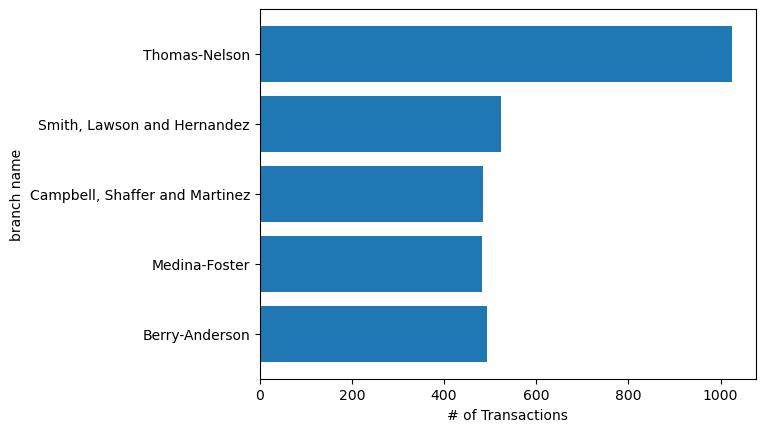

In [20]:
# plotting data
plt.barh(Tr_MI_count['merchant_name'].head(), Tr_MI_count['count'].head())
plt.xlabel('# of Transactions')
plt.ylabel('branch name')
plt.show()

### 1.3.3

In [21]:
# Groupping by days
Tr_Month_Details = Tr_Date.groupby(Tr_Date['transaction_date'].str[-5:]).size().reset_index(name='total')
Tr_Month_Details.rename(columns={'transaction_date': 'Day of Year'}, inplace=True);
Tr_Month_Details

Day of Year  total
0         01-01     16
1         01-02      9
2         01-03     14
3         01-04     15
4         01-05     17
..          ...    ...
361       12-27     15
362       12-28     14
363       12-29     12
364       12-30     12
365       12-31      6

[366 rows x 2 columns]

In [22]:
#Averaging: Computing new data
Tr_Month_Details1 = Tr_Month_Details.groupby(Tr_Month_Details['Day of Year'].str[0:2])['total'].agg(['max', 'min', 'mean']).reset_index()
Tr_Month_Details1.rename(columns={'Day of Year': 'Month'}, inplace=True);
Tr_Month_Details1

Month  max  min       mean
0     01   19    4  12.322581
1     02   25    5  13.448276
2     03   22    6  14.612903
3     04   27    6  16.300000
4     05   28   10  19.193548
5     06   40   13  24.633333
6     07   45    2  19.161290
7     08   13    3   7.129032
8     09   15    3   8.200000
9     10   14    4   9.451613
10    11   21    4  10.000000
11    12   16    5   9.612903

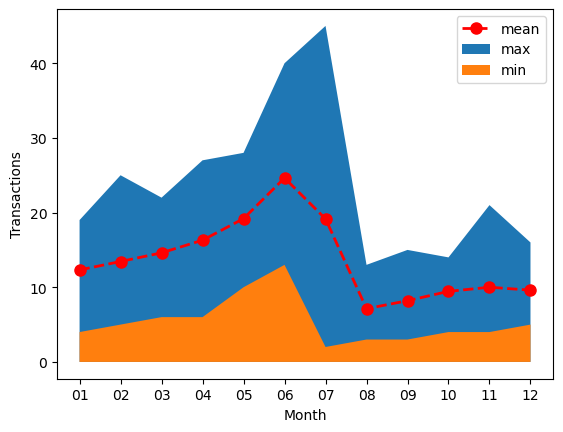

In [23]:
# plotting
fig , ax = plt.subplots()
ax.plot(Tr_Month_Details1['Month'], Tr_Month_Details1['mean'], label = 'mean', color='red', linestyle='--', linewidth=2, marker='o', markersize=8)
ax.fill_between(Tr_Month_Details1['Month'], Tr_Month_Details1['max'], label = 'max')
ax.fill_between(Tr_Month_Details1['Month'], Tr_Month_Details1['min'], label = 'min')
ax.set_xlabel('Month')
ax.set_ylabel('Transactions')
ax.legend(loc='upper right')
plt.show()

### 1.3.4

In [24]:
# Groupping by status
Data1_Transation_status = Data1_Transation.groupby('transaction_status').apply(lambda x: x).reset_index(drop=True)
Tr_Status_Sub = Data1_Transation_status[Data1_Transation_status['transaction_status'] == 'subscribed']
Tr_Status_Brn = Data1_Transation_status[Data1_Transation_status['transaction_status'] == 'burned']

In [25]:
# Status: burned
# Groupping by days
Tr_Status_Brn_Month_Details = Tr_Status_Brn.groupby(Tr_Status_Brn['transaction_date'].str[-5:]).size().reset_index(name='total')
Tr_Status_Brn_Month_Details.rename(columns={'transaction_date': 'Day of Year'}, inplace=True);
Tr_Status_Brn_Month_Details

Day of Year  total
0         01-01      5
1         01-02      1
2         01-03      8
3         01-04      9
4         01-05      7
..          ...    ...
358       12-27      7
359       12-28      8
360       12-29      4
361       12-30      4
362       12-31      2

[363 rows x 2 columns]

In [26]:
#Averaging: Computing new data
Tr_Status_Brn_Month_Details1 = Tr_Status_Brn_Month_Details.groupby(Tr_Status_Brn_Month_Details['Day of Year'].str[0:2])['total'].agg(['max', 'min', 'mean']).reset_index()
Tr_Status_Brn_Month_Details1.rename(columns={'Day of Year': 'Month'}, inplace=True);
Tr_Status_Brn_Month_Details1

Month  max  min       mean
0     01   11    1   6.290323
1     02   16    2   6.862069
2     03   12    2   7.483871
3     04   14    2   7.800000
4     05   18    6  10.129032
5     06   20    4  12.033333
6     07   23    1   9.900000
7     08    8    1   3.935484
8     09    8    1   3.965517
9     10   12    2   4.774194
10    11   12    2   4.900000
11    12    9    1   5.066667

In [27]:
# Status: subscribed
# Groupping by days
Tr_Status_Sub_Month_Details = Tr_Status_Sub.groupby(Tr_Status_Sub['transaction_date'].str[-5:]).size().reset_index(name='total')
Tr_Status_Sub_Month_Details.rename(columns={'transaction_date': 'Day of Year'}, inplace=True);
Tr_Status_Sub_Month_Details

Day of Year  total
0         01-01     11
1         01-02      8
2         01-03      6
3         01-04      6
4         01-05     10
..          ...    ...
357       12-27      8
358       12-28      6
359       12-29      8
360       12-30      8
361       12-31      4

[362 rows x 2 columns]

In [28]:
#Averaging: Computing new data
Tr_Status_Sub_Month_Details1 = Tr_Status_Sub_Month_Details.groupby(Tr_Status_Sub_Month_Details['Day of Year'].str[0:2])['total'].agg(['max', 'min', 'mean']).reset_index()
Tr_Status_Sub_Month_Details1.rename(columns={'Day of Year': 'Month'}, inplace=True);
Tr_Status_Sub_Month_Details1

Month  max  min       mean
0     01   12    2   6.032258
1     02   14    1   6.586207
2     03   15    2   7.129032
3     04   15    4   8.500000
4     05   17    1   9.064516
5     06   20    6  12.600000
6     07   25    1   9.900000
7     08    6    1   3.413793
8     09    9    2   4.517241
9     10    9    1   4.677419
10    11   11    2   5.100000
11    12    9    2   4.709677

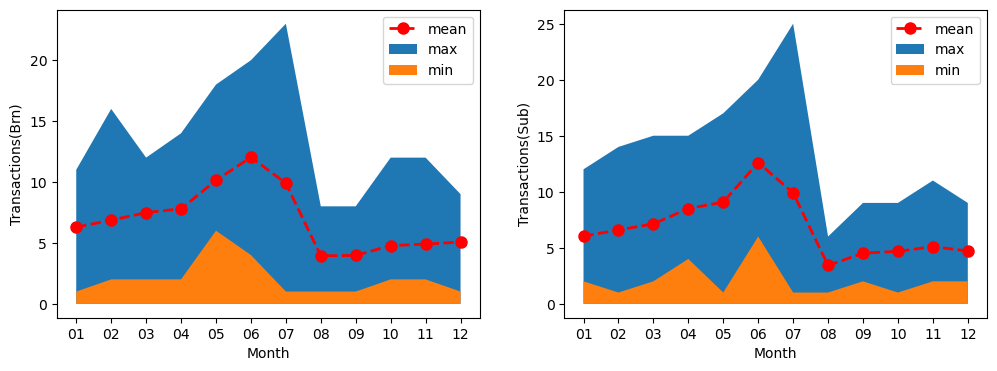

In [32]:
# plotting
fig , ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(Tr_Status_Brn_Month_Details1['Month'], Tr_Status_Brn_Month_Details1['mean'], label = 'mean', color='red', linestyle='--', linewidth=2, marker='o', markersize=8)
ax[0].fill_between(Tr_Status_Brn_Month_Details1['Month'], Tr_Status_Brn_Month_Details1['max'], label = 'max')
ax[0].fill_between(Tr_Status_Brn_Month_Details1['Month'], Tr_Status_Brn_Month_Details1['min'], label = 'min')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Transactions(Brn)')
ax[0].legend(loc='upper right')
ax[1].plot(Tr_Status_Sub_Month_Details1['Month'], Tr_Status_Sub_Month_Details1['mean'], label = 'mean', color='red', linestyle='--', linewidth=2, marker='o', markersize=8)
ax[1].fill_between(Tr_Status_Sub_Month_Details1['Month'], Tr_Status_Sub_Month_Details1['max'], label = 'max')
ax[1].fill_between(Tr_Status_Sub_Month_Details1['Month'], Tr_Status_Sub_Month_Details1['min'], label = 'min')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Transactions(Sub)')
ax[1].legend(loc='upper right')
plt.show()

Observable in plots and tables provided, distribution of *subscribed* and *burned* status transactions are more or less the same with minor difference in smoothness and consistency

**Explain your approach and assumptions once this section is completed.**

explained via comment and markdowns next to each part

# 2. Canadian Cheese Directory!

The database of Canadian cheeses made from cow, goat, sheep or buffalo milk has been provided.

In this question you will again perform data wrangling and interpretation.

## 2.1 Loading Phase 

Load the csv file into a `DataFrame`

In [19]:
NoteBookDir = os.getcwd()
DataDir = os.path.join(NoteBookDir,'data')
Data2Dir = os.path.join(DataDir,'Q2')
CSVData2Dir = os.path.join(Data2Dir,'cheese_data.csv')
Data2 = pd.read_csv(CSVData2Dir)
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1042 non-null   int64  
 1   CheeseId              1042 non-null   int64  
 2   ManufacturerProvCode  1042 non-null   object 
 3   ManufacturingTypeEn   1042 non-null   object 
 4   MoisturePercent       1028 non-null   float64
 5   FlavourEn             801 non-null    object 
 6   CharacteristicsEn     643 non-null    object 
 7   Organic               1042 non-null   int64  
 8   CategoryTypeEn        1019 non-null   object 
 9   MilkTypeEn            1041 non-null   object 
 10  MilkTreatmentTypeEn   977 non-null    object 
 11  RindTypeEn            721 non-null    object 
 12  CheeseName            1042 non-null   object 
 13  FatLevel              1042 non-null   object 
 14  FatIndex              1042 non-null   int64  
dtypes: float64(1), int64(

## 2.2 Cleaning Phase 

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  
2. Indicate and transform the attributes that are `Categorical`.
3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?
4. What are the possible pitfalls of having such columns?

Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

### 2.2.1

In [20]:
# Attributes types and size
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1042 non-null   int64  
 1   CheeseId              1042 non-null   int64  
 2   ManufacturerProvCode  1042 non-null   object 
 3   ManufacturingTypeEn   1042 non-null   object 
 4   MoisturePercent       1028 non-null   float64
 5   FlavourEn             801 non-null    object 
 6   CharacteristicsEn     643 non-null    object 
 7   Organic               1042 non-null   int64  
 8   CategoryTypeEn        1019 non-null   object 
 9   MilkTypeEn            1041 non-null   object 
 10  MilkTreatmentTypeEn   977 non-null    object 
 11  RindTypeEn            721 non-null    object 
 12  CheeseName            1042 non-null   object 
 13  FatLevel              1042 non-null   object 
 14  FatIndex              1042 non-null   int64  
dtypes: float64(1), int64(

In [21]:
# Describing numerical Att.s
Data2.describe()

Unnamed: 0     CheeseId  MoisturePercent      Organic     FatIndex
count  1042.000000  1042.000000      1028.000000  1042.000000  1042.000000
mean    520.500000  1560.633397        47.069747     0.095010     0.343570
std     300.943793   451.811164         9.592647     0.293369     0.475128
min       0.000000   228.000000        12.000000     0.000000     0.000000
25%     260.250000  1280.250000        40.000000     0.000000     0.000000
50%     520.500000  1548.500000        46.000000     0.000000     0.000000
75%     780.750000  1901.750000        52.000000     0.000000     1.000000
max    1041.000000  2391.000000        92.000000     1.000000     1.000000

**Explain your approach and assumptions once this section is completed.**

### 2.2.2

In [22]:
# Describing categorical columns
{col: Data2[col].value_counts() for col in Data2.select_dtypes(include=['object']).columns}

{'ManufacturerProvCode': ManufacturerProvCode
 QC    796
 ON    115
 BC     65
 NB     27
 AB     13
 MB     11
 NS     10
 NL      2
 PE      2
 SK      1
 Name: count, dtype: int64,
 'ManufacturingTypeEn': ManufacturingTypeEn
 Industrial    455
 Artisan       367
 Farmstead     220
 Name: count, dtype: int64,
 'FlavourEn': FlavourEn
 Mild                                                                                               59
 Sharp                                                                                              13
 Hazelnut flavor that intensifies with age                                                          10
 Hazelnut flavour that intensifies with age                                                          9
 Milk, hazelnut and mushroom flavor                                                                  6
                                                                                                    ..
 Sharp, flavours of cream and mushrooms      

### 2.2.3

column *FatLevel* and *FatIndex* are exactly the same.

### 2.2.4

1. **Increased Memory Usage**: Storing similar or duplicate data consumes more memory, which can be inefficient, especially with large datasets.

2. **Data Inconsistency**: If similar columns are updated independently, it can lead to inconsistencies in the data, making it difficult to trust the information.

3. **Difficulties in Data Visualization**: Visualizing data with redundant columns can result in cluttered graphs or misleading interpretations, as the same information may be represented multiple times.

4. **Complicated Data Cleaning**: Redundant columns require additional steps during data cleaning, as you need to identify and decide how to handle or merge similar columns.

In [23]:
Data2_Reduced = Data2.drop(columns=['FatLevel'])
Data2_Reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1042 non-null   int64  
 1   CheeseId              1042 non-null   int64  
 2   ManufacturerProvCode  1042 non-null   object 
 3   ManufacturingTypeEn   1042 non-null   object 
 4   MoisturePercent       1028 non-null   float64
 5   FlavourEn             801 non-null    object 
 6   CharacteristicsEn     643 non-null    object 
 7   Organic               1042 non-null   int64  
 8   CategoryTypeEn        1019 non-null   object 
 9   MilkTypeEn            1041 non-null   object 
 10  MilkTreatmentTypeEn   977 non-null    object 
 11  RindTypeEn            721 non-null    object 
 12  CheeseName            1042 non-null   object 
 13  FatIndex              1042 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 114.1+ KB


## 2.3 Querying Phase

Answer the following queries using the functionality of `Pandas`.

* Plot the **proportion** of **ManufacturingTypeEn**, **MoisturePercent**, **CategoryTypeEn**, **MilkTypeEn** columns in four subplots using pie diagrams.

* Categorize the dataframe by the **FatIndex**. Calculate the proportion of each FatIndex in the previous columns (ManufacturingTypeEn, MoisturePercent, CategoryTypeEn, MilkTypeEn) and present your results in a **stacked bar chart**.

* Separate the MoisturePercent values into two intervals that have (approximately) the same number of cheese products in the dataset. Categorize the dataset based on MoistureIndex, FatIndex, ManufacturingTypeEn, MoisturePercent, CategoryTypeEn, MilkTypeEn and calculate the proportions of each category. Represent your results in a separate `DataFrame`.

* Is there any row that is slightly more popular than the others? Do you see any correlation between the cheese attributes and their popularity?


### 2.3.1

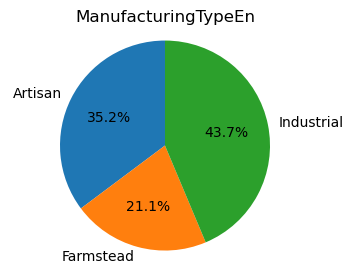

ManufacturingTypeEn  Count
0             Artisan    367
1           Farmstead    220
2          Industrial    455

In [24]:
# Extracting ManufacturingTypeEn
Data2_ManufacturingTypeEn = Data2.groupby(Data2['ManufacturingTypeEn']).size().reset_index(name='Count')
# Plotting the pie chart
plt.figure(figsize=(4, 3))
plt.pie(Data2_ManufacturingTypeEn['Count'], labels=Data2_ManufacturingTypeEn['ManufacturingTypeEn'], autopct='%1.1f%%', startangle=90)
plt.title('ManufacturingTypeEn')
plt.axis('equal')  
plt.show()
Data2_ManufacturingTypeEn 

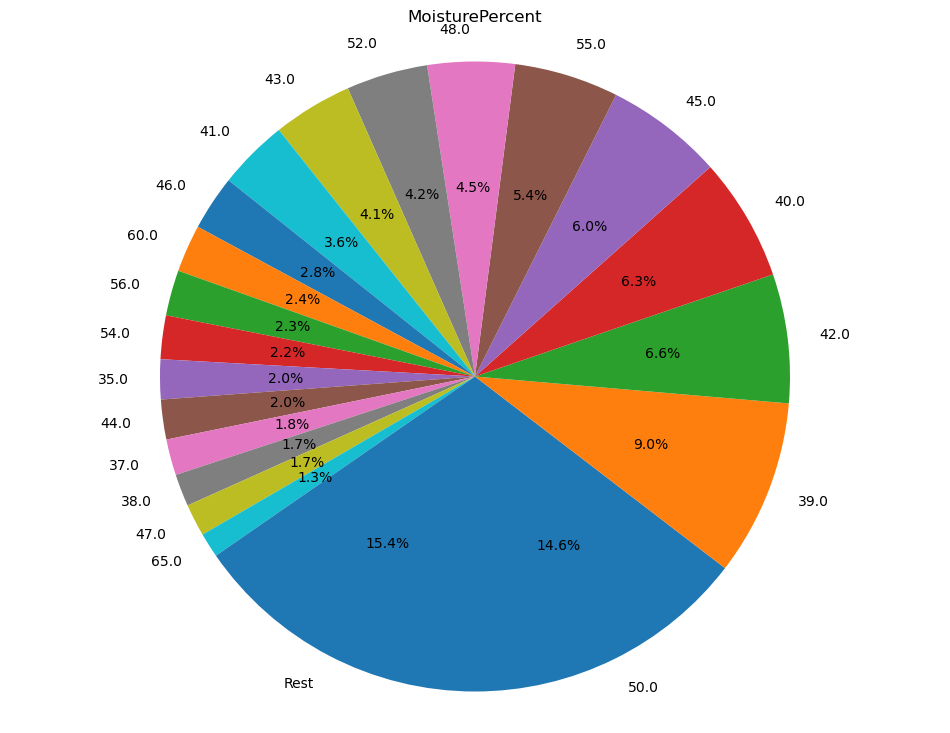

MoisturePercent  Count
37             50.0    150
21             39.0     93
25             42.0     68
22             40.0     65
30             45.0     62
43             55.0     55
34             48.0     46
40             52.0     43
28             43.0     42
24             41.0     37
31             46.0     29
48             60.0     25
44             56.0     24
42             54.0     23
29             44.0     21
17             35.0     21
19             37.0     19
32             47.0     17
20             38.0     17
53             65.0     13

In [25]:
# Extracting MoisturePercent
Data2_MoisturePercent = Data2.groupby(Data2['MoisturePercent']).size().reset_index(name='Count')
Top20 = Data2_MoisturePercent.nlargest(20, 'Count')
Rest_sum = Data2_MoisturePercent['Count'].sum() - Top20['Count'].sum()
Rest = pd.DataFrame({'MoisturePercent': ['Rest'], 'Count': [Rest_sum]})
pie_data = pd.concat([Top20, Rest], ignore_index=True)
plt.figure(figsize=(12, 9))
plt.pie(pie_data['Count'], labels=pie_data['MoisturePercent'], autopct='%1.1f%%', startangle=-90)
plt.title('MoisturePercent')
plt.axis('equal')  
plt.show()
Data2_MoisturePercent.sort_values('Count', ascending=False) .head(20)

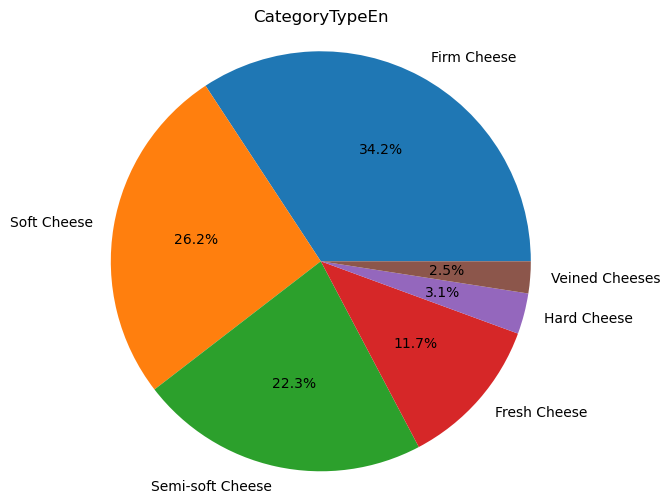

CategoryTypeEn  Count
0       Firm Cheese    349
4       Soft Cheese    267
3  Semi-soft Cheese    227
1      Fresh Cheese    119
2       Hard Cheese     32
5    Veined Cheeses     25

In [26]:
# Extracting CategoryTypeEn
Data2_CategoryTypeEn = Data2.groupby(Data2['CategoryTypeEn']).size().reset_index(name='Count')
Data2_CategoryTypeEn = Data2_CategoryTypeEn.sort_values('Count', ascending=False)
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Data2_CategoryTypeEn['Count'], labels=Data2_CategoryTypeEn['CategoryTypeEn'], autopct='%1.1f%%', startangle=0)
plt.title('CategoryTypeEn')
plt.axis('equal')  
plt.show()
Data2_CategoryTypeEn 

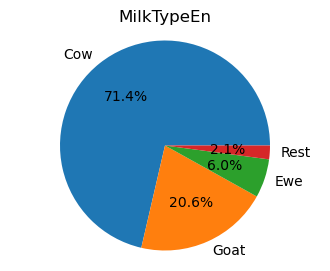

MilkTypeEn  Count
1        Cow    743
7       Goat    214
4        Ewe     62

In [27]:
# Extracting MilkTypeEn
Data2_MilkTypeEn = Data2.groupby(Data2['MilkTypeEn']).size().reset_index(name='Count')
Top3 = Data2_MilkTypeEn.nlargest(3, 'Count')
Rest_sum = Data2_MilkTypeEn['Count'].sum() - Top3['Count'].sum()
Rest = pd.DataFrame({'MilkTypeEn': ['Rest'], 'Count': [Rest_sum]})
pie_data = pd.concat([Top3, Rest], ignore_index=True)
plt.figure(figsize=(4, 3))
plt.pie(pie_data['Count'], labels=pie_data['MilkTypeEn'], autopct='%1.1f%%', startangle=0)
plt.title('MilkTypeEn')
plt.axis('equal')  
plt.show()
Data2_MilkTypeEn.sort_values('Count', ascending=False).head(3) 

### 2.3.2

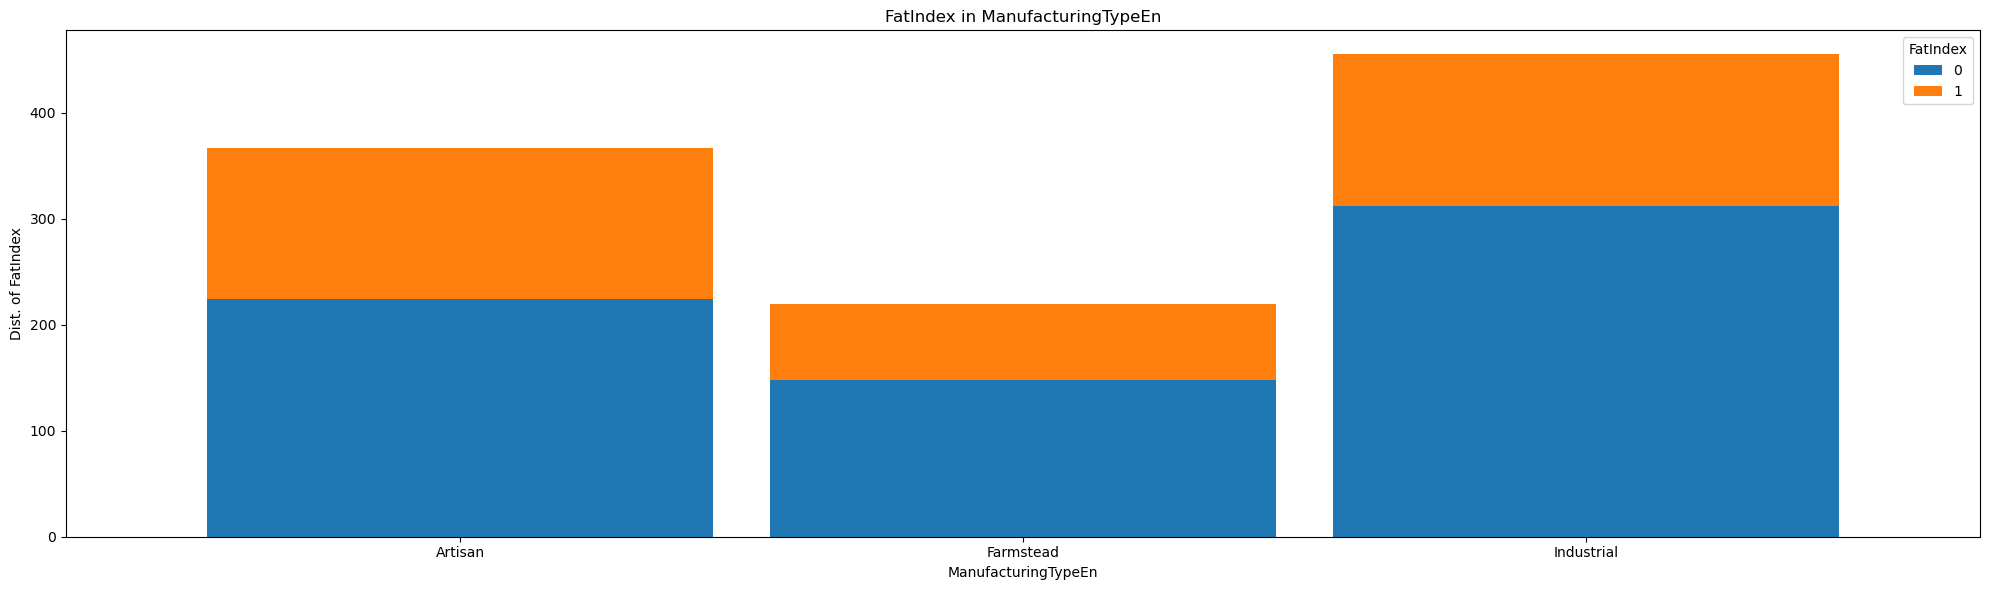

FatIndex               0    1
ManufacturingTypeEn          
Artisan              224  143
Farmstead            148   72
Industrial           312  143

In [28]:
# Groupping by ManufacturingTypeEn
ManufacturingTypeEn_Fat_Dist = Data2.groupby(['ManufacturingTypeEn', 'FatIndex']).size().unstack(fill_value=0)
# plotting
ManufacturingTypeEn_Fat_Dist.plot(kind='bar', stacked=True, figsize=(20, 6), width = 0.9)
plt.title('FatIndex in ManufacturingTypeEn')
plt.xlabel('ManufacturingTypeEn')
plt.ylabel('Dist. of FatIndex')
plt.legend(title='FatIndex')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()
ManufacturingTypeEn_Fat_Dist

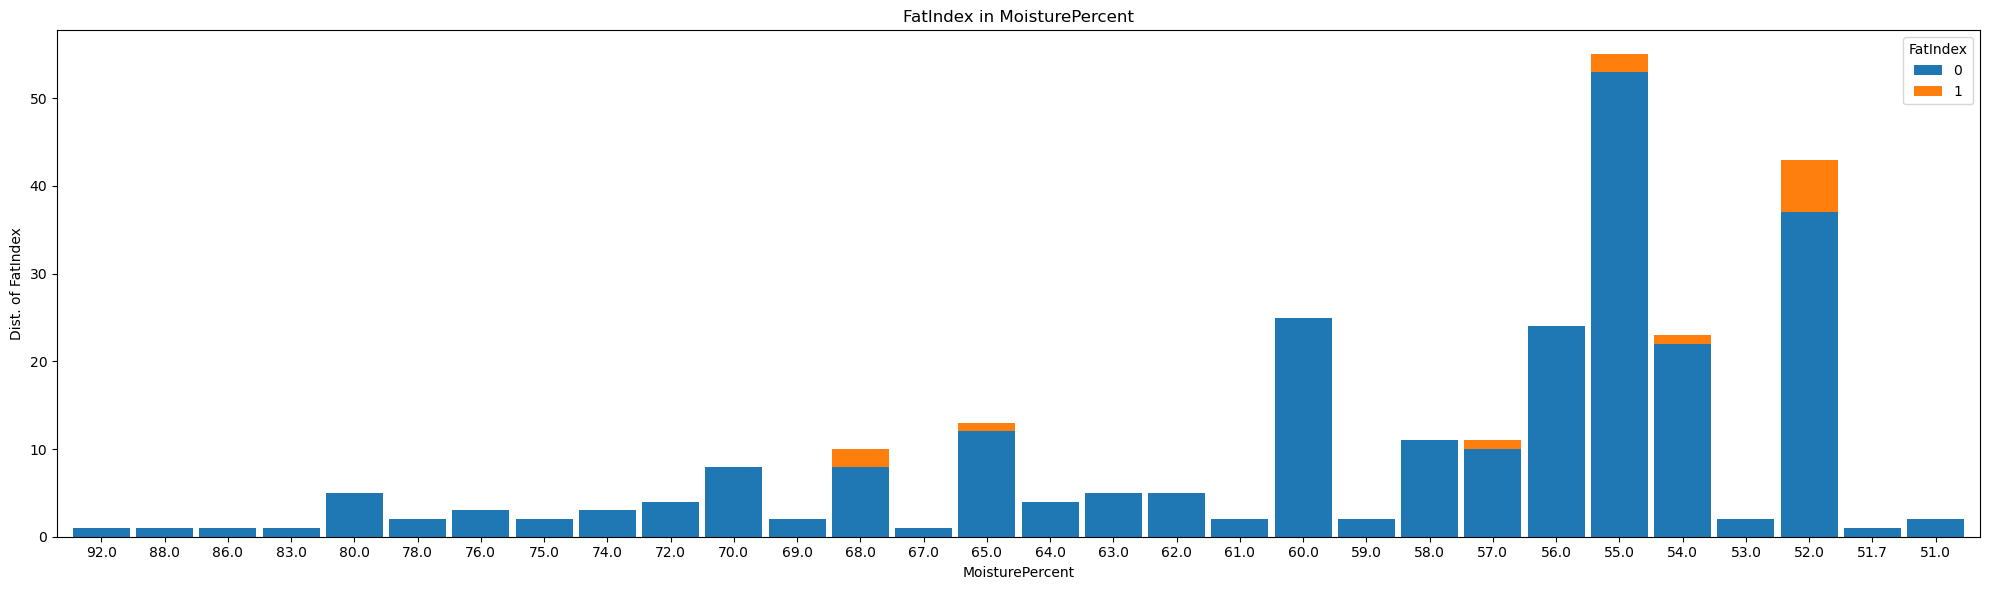

FatIndex          0  1
MoisturePercent       
92.0              1  0
88.0              1  0
86.0              1  0
83.0              1  0
80.0              5  0
78.0              2  0
76.0              3  0
75.0              2  0
74.0              3  0
72.0              4  0
70.0              8  0
69.0              2  0
68.0              8  2
67.0              1  0
65.0             12  1
64.0              4  0
63.0              5  0
62.0              5  0
61.0              2  0
60.0             25  0
59.0              2  0
58.0             11  0
57.0             10  1
56.0             24  0
55.0             53  2
54.0             22  1
53.0              2  0
52.0             37  6
51.7              1  0
51.0              2  0

In [29]:
# Groupping by MoisturePercent
MoisturePercent_Fat_Dist = Data2.groupby(['MoisturePercent', 'FatIndex']).size().unstack(fill_value=0)
MoisturePercent_Fat_Dist = MoisturePercent_Fat_Dist.sort_values('MoisturePercent', ascending=False)
MoisturePercent_Fat_Dist1 = MoisturePercent_Fat_Dist.head(30)
# plotting top 30
MoisturePercent_Fat_Dist1.plot(kind='bar', stacked=True, figsize=(20, 6), width = 0.9)
plt.title('FatIndex in MoisturePercent')
plt.xlabel('MoisturePercent')
plt.ylabel('Dist. of FatIndex')
plt.legend(title='FatIndex')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()
MoisturePercent_Fat_Dist1

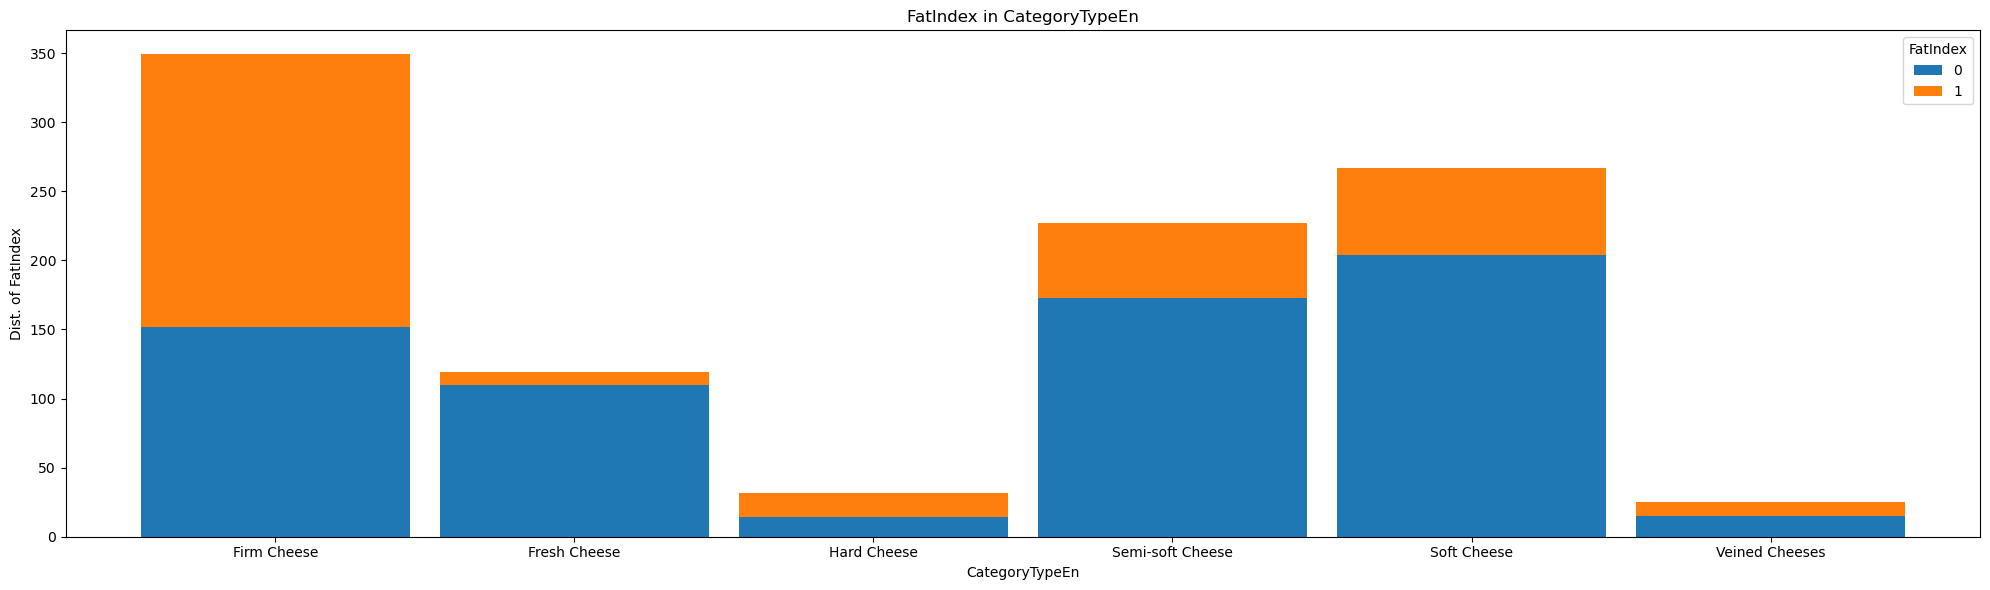

FatIndex            0    1
CategoryTypeEn            
Firm Cheese       152  197
Fresh Cheese      110    9
Hard Cheese        14   18
Semi-soft Cheese  173   54
Soft Cheese       204   63
Veined Cheeses     15   10

In [30]:
# Groupping by CategoryTypeEn
CategoryTypeEn = Data2.groupby(['CategoryTypeEn', 'FatIndex']).size().unstack(fill_value=0)
# plotting
CategoryTypeEn.plot(kind='bar', stacked=True, figsize=(20, 6), width = 0.9)
plt.title('FatIndex in CategoryTypeEn')
plt.xlabel('CategoryTypeEn')
plt.ylabel('Dist. of FatIndex')
plt.legend(title='FatIndex')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()
CategoryTypeEn

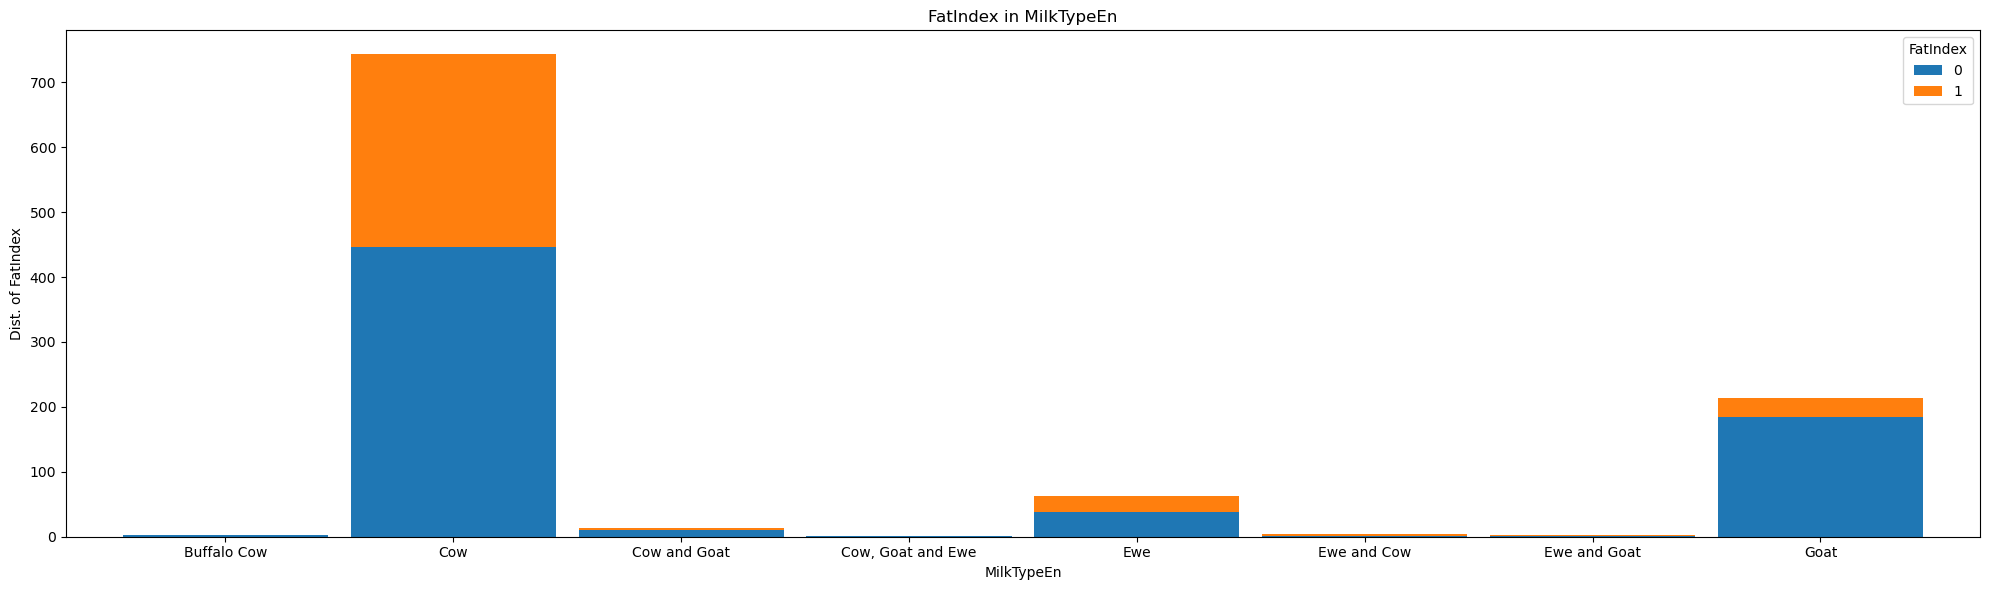

FatIndex             0    1
MilkTypeEn                 
Buffalo Cow          2    0
Cow                446  297
Cow and Goat        10    3
Cow, Goat and Ewe    1    0
Ewe                 38   24
Ewe and Cow          1    3
Ewe and Goat         1    1
Goat               185   29

In [31]:
# Groupping by MilkTypeEn
MilkTypeEn_Fat_Dist = Data2.groupby(['MilkTypeEn', 'FatIndex']).size().unstack(fill_value=0)
# plotting
MilkTypeEn_Fat_Dist.plot(kind='bar', stacked=True, figsize=(20, 6), width = 0.9)
plt.title('FatIndex in MilkTypeEn')
plt.xlabel('MilkTypeEn')
plt.ylabel('Dist. of FatIndex')
plt.legend(title='FatIndex')
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()
MilkTypeEn_Fat_Dist

**Explain your approach and assumptions once this section is completed.**

### 2.3.3

In [32]:
# Finding the halfener line
# Sort the DataFrame by 'MoisturePercent'
Data2_MoisturePercent = Data2_MoisturePercent.sort_values(by='MoisturePercent', ascending=False)
# Calculate the cumulative sum of 'Count'
Data2_MoisturePercent['CumulativeCount'] = Data2_MoisturePercent['Count'].cumsum()
# Calculate the total sum of 'Count'
total_count = Data2_MoisturePercent['Count'].sum()
target = total_count / 2
# Find the index where the cumulative count is closest to the target
Data2_MoisturePercent['Difference'] = (Data2_MoisturePercent['CumulativeCount'] - target).abs()
split_index = Data2_MoisturePercent['Difference'].idxmin()
split_value = Data2_MoisturePercent.loc[split_index, 'MoisturePercent']
split_value

46.0

**MoistureHigh**

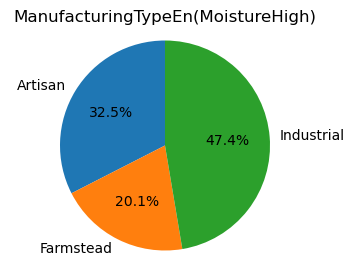

ManufacturingTypeEn  Count
0             Artisan    160
1           Farmstead     99
2          Industrial    233

In [33]:
# ManufacturingTypeEn
Data2_MoistureHigh = Data2[Data2['MoisturePercent'] > split_value]
# # Extracting ManufacturingTypeEn
MoistureHigh_ManufacturingTypeEn = Data2_MoistureHigh.groupby(Data2_MoistureHigh['ManufacturingTypeEn']).size().reset_index(name='Count')
# Plotting the pie chart
plt.figure(figsize=(4, 3))
plt.pie(MoistureHigh_ManufacturingTypeEn['Count'], 
        labels=MoistureHigh_ManufacturingTypeEn['ManufacturingTypeEn'], autopct='%1.1f%%', startangle=90)
plt.title('ManufacturingTypeEn(MoistureHigh)')
plt.axis('equal')  
plt.show()
MoistureHigh_ManufacturingTypeEn 

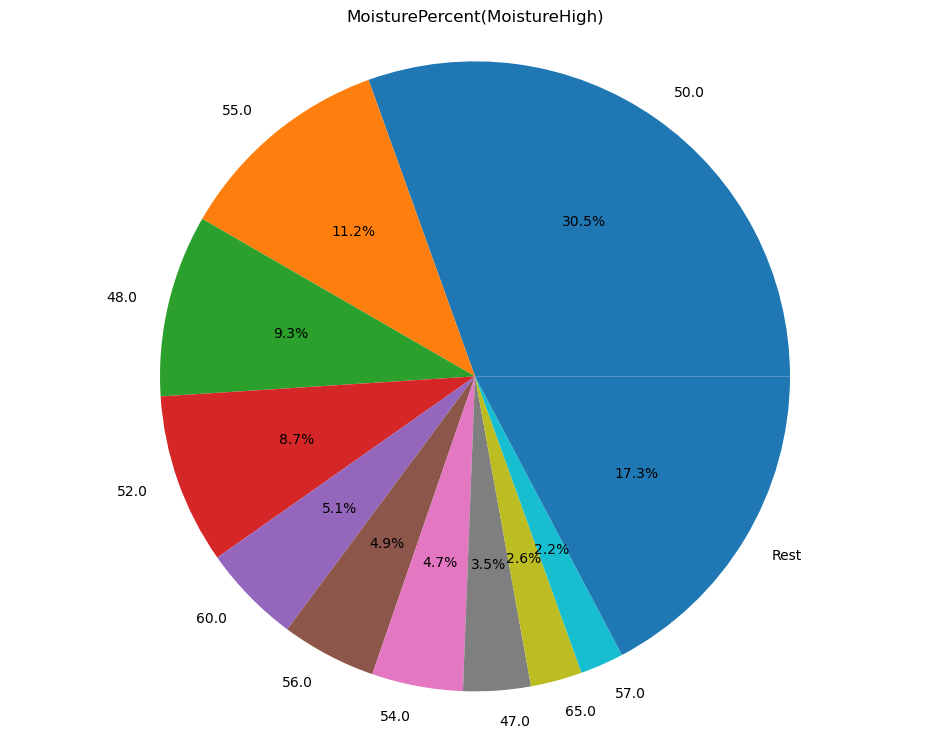

MoisturePercent  Count
5              50.0    150
11             55.0     55
2              48.0     46
8              52.0     43
16             60.0     25
12             56.0     24
10             54.0     23
0              47.0     17
21             65.0     13
13             57.0     11

In [34]:
# MoisturePercent
Data2_MoistureHigh_MoisturePercent = Data2_MoistureHigh.groupby(Data2_MoistureHigh['MoisturePercent']).size().reset_index(name='Count')
Top10 = Data2_MoistureHigh_MoisturePercent.nlargest(10, 'Count')
Rest_sum = Data2_MoistureHigh_MoisturePercent['Count'].sum() - Top10['Count'].sum()
Rest = pd.DataFrame({'MoisturePercent': ['Rest'], 'Count': [Rest_sum]})
pie_data = pd.concat([Top10, Rest], ignore_index=True)
plt.figure(figsize=(12, 9))
plt.pie(pie_data['Count'], labels=pie_data['MoisturePercent'], autopct='%1.1f%%', startangle=0)
plt.title('MoisturePercent(MoistureHigh)')
plt.axis('equal')  
plt.show()
Data2_MoistureHigh_MoisturePercent.sort_values('Count', ascending=False).head(10) 

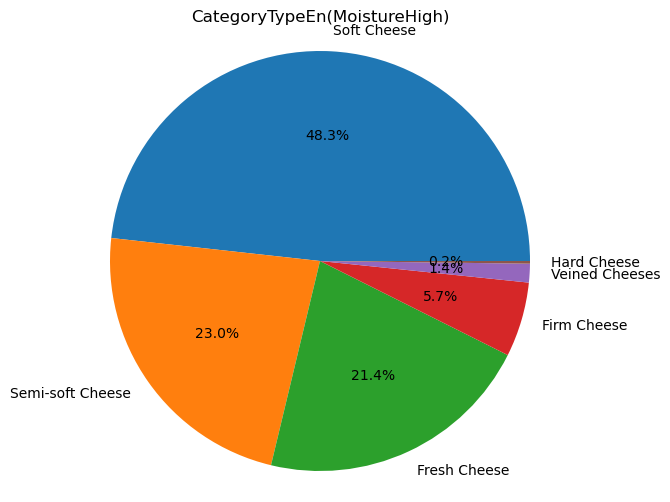

CategoryTypeEn  Count
4       Soft Cheese    235
3  Semi-soft Cheese    112
1      Fresh Cheese    104
0       Firm Cheese     28
5    Veined Cheeses      7
2       Hard Cheese      1

In [35]:
# CategoryTypeEn
Data2_MoistureHigh_CategoryTypeEn = Data2_MoistureHigh.groupby(Data2_MoistureHigh['CategoryTypeEn']).size().reset_index(name='Count')
Data2_MoistureHigh_CategoryTypeEn = Data2_MoistureHigh_CategoryTypeEn.sort_values('Count', ascending=False)
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Data2_MoistureHigh_CategoryTypeEn['Count'], labels=Data2_MoistureHigh_CategoryTypeEn['CategoryTypeEn'], autopct='%1.1f%%', startangle=0)
plt.title('CategoryTypeEn(MoistureHigh)')
plt.axis('equal')  
plt.show()
Data2_MoistureHigh_CategoryTypeEn 

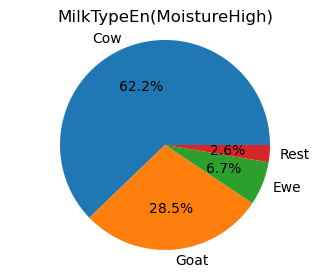

MilkTypeEn  Count
1                Cow    306
6               Goat    140
4                Ewe     33
2       Cow and Goat      9
0        Buffalo Cow      2
3  Cow, Goat and Ewe      1
5       Ewe and Goat      1

In [36]:
# MilkTypeEn
Data2_MoistureHigh_MilkTypeEn = Data2_MoistureHigh.groupby(Data2_MoistureHigh['MilkTypeEn']).size().reset_index(name='Count')
Top3 = Data2_MoistureHigh_MilkTypeEn.nlargest(3, 'Count')
Rest_sum = Data2_MoistureHigh_MilkTypeEn['Count'].sum() - Top3['Count'].sum()
Rest = pd.DataFrame({'MilkTypeEn': ['Rest'], 'Count': [Rest_sum]})
pie_data = pd.concat([Top3, Rest], ignore_index=True)
plt.figure(figsize=(4, 3))
plt.pie(pie_data['Count'], labels=pie_data['MilkTypeEn'], autopct='%1.1f%%', startangle=0)
plt.title('MilkTypeEn(MoistureHigh)')
plt.axis('equal')  
plt.show()
Data2_MoistureHigh_MilkTypeEn.sort_values('Count', ascending=False) 

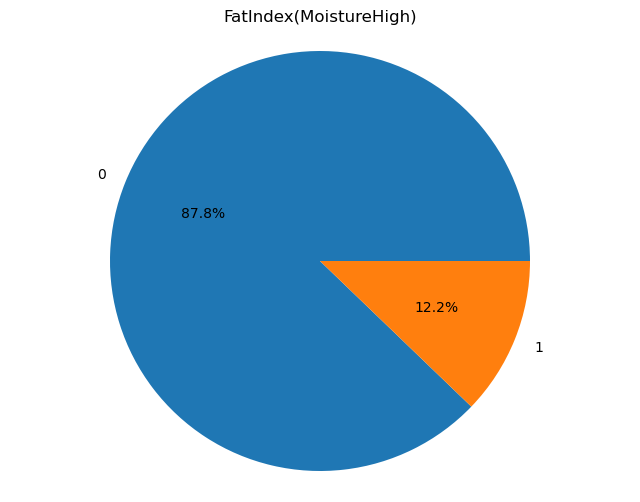

FatIndex  Count
0         0    432
1         1     60

In [37]:
# FatIndex
Data2_MoistureHigh_FatIndex = Data2_MoistureHigh.groupby(Data2_MoistureHigh['FatIndex']).size().reset_index(name='Count')
Data2_MoistureHigh_FatIndex = Data2_MoistureHigh_FatIndex.sort_values('Count', ascending=False)
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Data2_MoistureHigh_FatIndex['Count'], labels=Data2_MoistureHigh_FatIndex['FatIndex'], autopct='%1.1f%%', startangle=0)
plt.title('FatIndex(MoistureHigh)')
plt.axis('equal')  
plt.show()
Data2_MoistureHigh_FatIndex 

**MoistureLow**

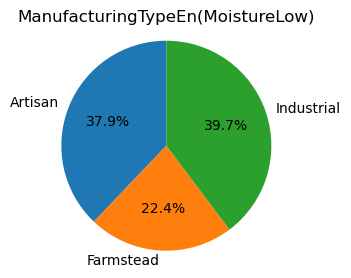

ManufacturingTypeEn  Count
0             Artisan    203
1           Farmstead    120
2          Industrial    213

In [38]:
# ManufacturingTypeEn
Data2_MoistureLow = Data2[Data2['MoisturePercent'] <= split_value]
# # Extracting ManufacturingTypeEn
MoistureLow_ManufacturingTypeEn = Data2_MoistureLow.groupby(Data2_MoistureLow['ManufacturingTypeEn']).size().reset_index(name='Count')
# Plotting the pie chart
plt.figure(figsize=(4, 3))
plt.pie(MoistureLow_ManufacturingTypeEn['Count'], 
        labels=MoistureLow_ManufacturingTypeEn['ManufacturingTypeEn'], autopct='%1.1f%%', startangle=90)
plt.title('ManufacturingTypeEn(MoistureLow)')
plt.axis('equal')  
plt.show()
MoistureLow_ManufacturingTypeEn 

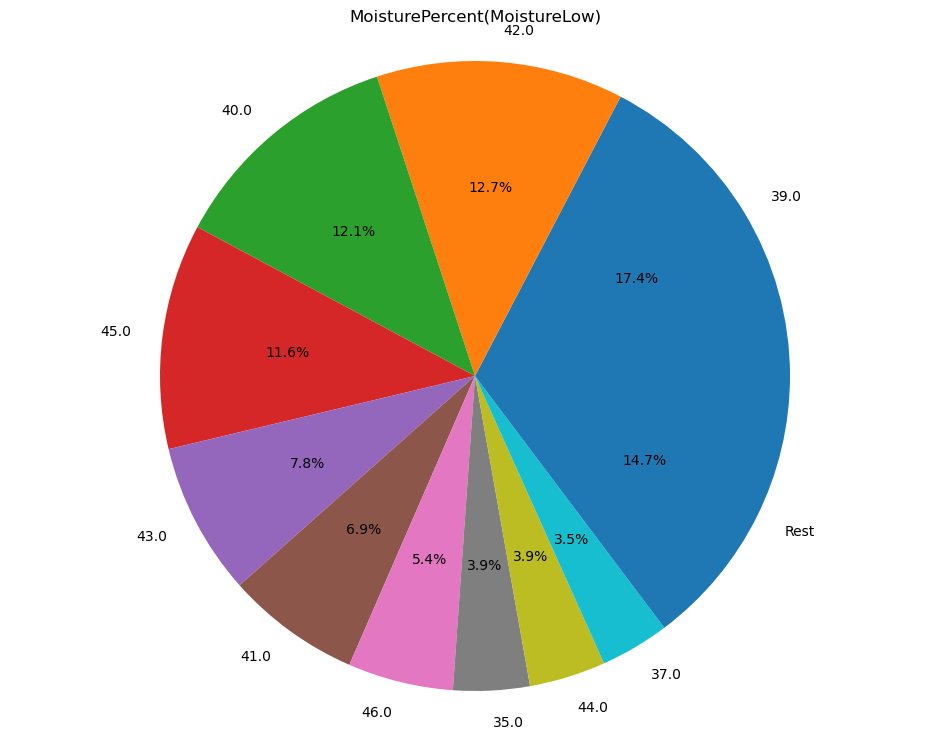

MoisturePercent  Count
21             39.0     93
25             42.0     68
22             40.0     65
30             45.0     62
28             43.0     42
24             41.0     37
31             46.0     29
17             35.0     21
29             44.0     21
19             37.0     19

In [39]:
# MoisturePercent
Data2_MoistureLow_MoisturePercent = Data2_MoistureLow.groupby(Data2_MoistureLow['MoisturePercent']).size().reset_index(name='Count')
Top10 = Data2_MoistureLow_MoisturePercent.nlargest(10, 'Count')
Rest_sum = Data2_MoistureLow_MoisturePercent['Count'].sum() - Top10['Count'].sum()
Rest = pd.DataFrame({'MoisturePercent': ['Rest'], 'Count': [Rest_sum]})
pie_data = pd.concat([Top10, Rest], ignore_index=True)
plt.figure(figsize=(12, 9))
plt.pie(pie_data['Count'], labels=pie_data['MoisturePercent'], autopct='%1.1f%%', startangle=0)
plt.title('MoisturePercent(MoistureLow)')
plt.axis('equal')  
plt.show()
Data2_MoistureLow_MoisturePercent.sort_values('Count', ascending=False).head(10) 

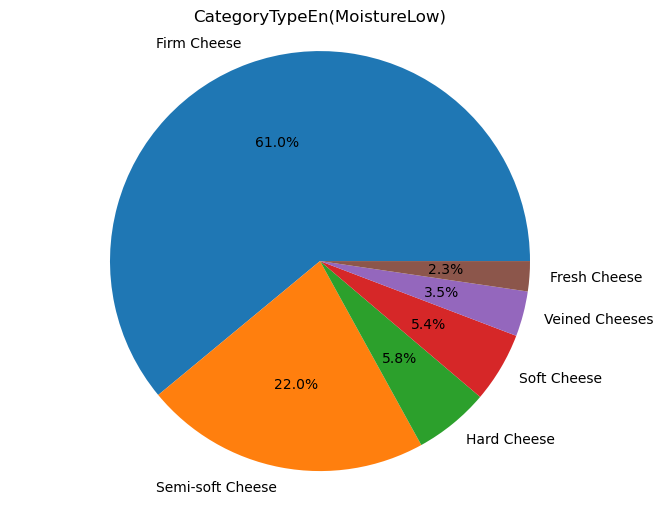

CategoryTypeEn  Count
0       Firm Cheese    316
3  Semi-soft Cheese    114
2       Hard Cheese     30
4       Soft Cheese     28
5    Veined Cheeses     18
1      Fresh Cheese     12

In [40]:
# CategoryTypeEn
Data2_MoistureLow_CategoryTypeEn = Data2_MoistureLow.groupby(Data2_MoistureLow['CategoryTypeEn']).size().reset_index(name='Count')
Data2_MoistureLow_CategoryTypeEn = Data2_MoistureLow_CategoryTypeEn.sort_values('Count', ascending=False)
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Data2_MoistureLow_CategoryTypeEn['Count'], labels=Data2_MoistureLow_CategoryTypeEn['CategoryTypeEn'], autopct='%1.1f%%', startangle=0)
plt.title('CategoryTypeEn(MoistureLow)')
plt.axis('equal')  
plt.show()
Data2_MoistureLow_CategoryTypeEn 

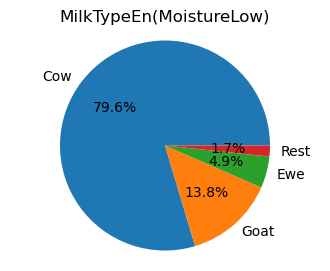

MilkTypeEn  Count
0           Cow    426
5          Goat     74
2           Ewe     26
1  Cow and Goat      4
3   Ewe and Cow      4
4  Ewe and Goat      1

In [41]:
# MilkTypeEn
Data2_MoistureLow_MilkTypeEn = Data2_MoistureLow.groupby(Data2_MoistureLow['MilkTypeEn']).size().reset_index(name='Count')
Top3 = Data2_MoistureLow_MilkTypeEn.nlargest(3, 'Count')
Rest_sum = Data2_MoistureLow_MilkTypeEn['Count'].sum() - Top3['Count'].sum()
Rest = pd.DataFrame({'MilkTypeEn': ['Rest'], 'Count': [Rest_sum]})
pie_data = pd.concat([Top3, Rest], ignore_index=True)
plt.figure(figsize=(4, 3))
plt.pie(pie_data['Count'], labels=pie_data['MilkTypeEn'], autopct='%1.1f%%', startangle=0)
plt.title('MilkTypeEn(MoistureLow)')
plt.axis('equal')  
plt.show()
Data2_MoistureLow_MilkTypeEn.sort_values('Count', ascending=False) 

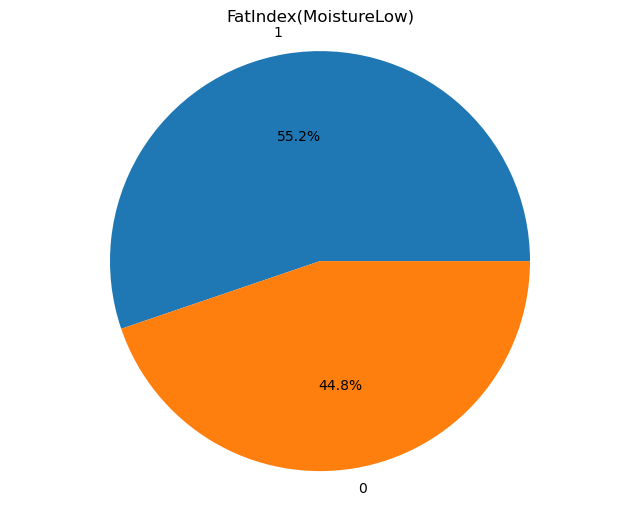

FatIndex  Count
1         1    296
0         0    240

In [42]:
# FatIndex
Data2_MoistureLow_FatIndex = Data2_MoistureLow.groupby(Data2_MoistureLow['FatIndex']).size().reset_index(name='Count')
Data2_MoistureLow_FatIndex = Data2_MoistureLow_FatIndex.sort_values('Count', ascending=False)
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(Data2_MoistureLow_FatIndex['Count'], labels=Data2_MoistureLow_FatIndex['FatIndex'], autopct='%1.1f%%', startangle=0)
plt.title('FatIndex(MoistureLow)')
plt.axis('equal')  
plt.show()
Data2_MoistureLow_FatIndex 

### 2.3.4

According to section `2.3.1` and `2.3.2` these are the popular features:

1. *ManufacturingTypeEn*: Industrial
2. *MoisturePercent*: 50.0%
3. *CategoryTypeEn*: Firm Cheese
4. *MilkTypeEn*: Cow
5. *FatIndex* : Low

In [45]:
Data2_Dummy = pd.get_dummies(Data2_Reduced, columns=Data2_Reduced.select_dtypes(include=['object']).columns)
Data2_Dummy

Unnamed: 0  CheeseId  MoisturePercent  Organic  FatIndex  \
0              0       228             47.0        0         0   
1              1       242             47.9        0         0   
2              2       301             54.0        0         0   
3              3       303             47.0        0         0   
4              4       319             49.4        1         0   
...          ...       ...              ...      ...       ...   
1037        1037      2387             37.0        1         1   
1038        1038      2388             46.0        0         0   
1039        1039      2389             40.0        0         1   
1040        1040      2390             34.0        0         1   
1041        1041      2391             31.5        0         1   

      ManufacturerProvCode_AB  ManufacturerProvCode_BC  \
0                       False                    False   
1                       False                    False   
2                       False                    False   
3                       False                    False   
4                       False                    False   
...                       ...                      ...   
1037                    False                    False   
1038                     True                    False   
1039                    False                    False   
1040                    False                    False   
1041                     True                    False   

      ManufacturerProvCode_MB  ManufacturerProvCode_NB  \
0                       False                     True   
1                       False                     True   
2                       False                    False   
3                       False                     True   
4                       False                     True   
...                       ...                      ...   
1037                    False                    False   
1038                    False                    False   
1039                    False                    False   
1040                    False                    False   
1041                    False                    False   

      ManufacturerProvCode_NL  ...  CheeseName_doré-mi  \
0                       False  ...               False   
1                       False  ...               False   
2                       False  ...               False   
3                       False  ...               False   
4                       False  ...               False   
...                       ...  ...                 ...   
1037                    False  ...               False   
1038                    False  ...               False   
1039                    False  ...               False   
1040                    False  ...               False   
1041                    False  ...               False   

      CheeseName_p'tit blanchon (le)  CheeseName_Écume des Rapides (L')  \
0                              False                              False   
1                              False                              False   
2                              False                              False   
3                              False                              False   
4                              False                              False   
...                              ...                                ...   
1037                           False                              False   
1038                           False                              False   
1039                           False                              False   
1040                           False                              False   
1041                           False                              False   

      CheeseName_Élan (L') (Fromagerie St-Albert)  CheeseName_Élan 7% (L')  \
0                                           False                    False   
1                                           False                

In [46]:
Data2_Dummy.corr()

Unnamed: 0  CheeseId  \
Unnamed: 0                                    1.000000  0.980996   
CheeseId                                      0.980996  1.000000   
MoisturePercent                              -0.015327 -0.009948   
Organic                                      -0.030536 -0.037155   
FatIndex                                     -0.005549 -0.008712   
...                                                ...       ...   
CheeseName_Élite (L')                         0.037660  0.032900   
CheeseName_Épave (L')                         0.050952  0.054519   
CheeseName_Étoile Bleue de Saint-Rémi (L')    0.051364  0.054793   
CheeseName_Étoile de Saint-Raymond L'         0.047758  0.051430   
CheeseName_Évanjules (L')                    -0.028387 -0.020290   

                                            MoisturePercent   Organic  \
Unnamed: 0                                        -0.015327 -0.030536   
CheeseId                                          -0.009948 -0.037155   
MoisturePercent                                    1.000000 -0.114607   
Organic                                           -0.114607  1.000000   
FatIndex                                          -0.495421  0.082607   
...                                                     ...       ...   
CheeseName_Élite (L')                              0.042082 -0.010042   
CheeseName_Épave (L')                             -0.016500 -0.010042   
CheeseName_Étoile Bleue de Saint-Rémi (L')        -0.023009 -0.010042   
CheeseName_Étoile de Saint-Raymond L'              0.009537 -0.010042   
CheeseName_Évanjules (L')                          0.009537 -0.010042   

                                            FatIndex  ManufacturerProvCode_AB  \
Unnamed: 0                                 -0.005549                 0.096047   
CheeseId                                   -0.008712                 0.095724   
MoisturePercent                            -0.495421                -0.055755   
Organic                                     0.082607                -0.036419   
FatIndex                                    1.000000                 0.027921   
...                                              ...                      ...   
CheeseName_Élite (L')                      -0.022423                -0.003484   
CheeseName_Épave (L')                      -0.022423                -0.003484   
CheeseName_Étoile Bleue de Saint-Rémi (L') -0.022423                -0.003484   
CheeseName_Étoile de Saint-Raymond L'       0.042841                -0.003484   
CheeseName_Évanjules (L')                  -0.022423                -0.003484   

                                            ManufacturerProvCode_BC  \
Unnamed: 0                                                -0.270949   
CheeseId                                                  -0.306673   
MoisturePercent                                           -0.146159   
Organic                                                    0.187084   
FatIndex                                                   0.155988   
...                                                             ...   
CheeseName_Élite (L')                                     -0.007994   
CheeseName_Épave (L')                                     -0.007994   
CheeseName_Étoile Bleue de Saint-Rémi (L')                -0.007994   
CheeseName_Étoile de Saint-Raymond L'                     -0.007994   
CheeseName_Évanjules (L')                                 -0.007994   

                                            ManufacturerProvCode_MB  \
Unnamed: 0                                                -0.021930   
CheeseId                                                  -0.031273   
MoisturePercent                                           -0.059922   
Organic                                                   -0.001444   
FatIndex                                                  -0.054955   
...                                                             ...   
CheeseName_Élite (L')      

It's a bit too general but we don't lose any correlations instead 😁  

# 3. Business Analyst Job Listings  

## 3.1 Loading Phase

As we will learn further in the course, a considerable source of data is free internet information which is crawled!

4092 business analyst job listings scraped from glassdoor are provided at `data/Q3`. Load the data in a `DataFrame`

In [146]:
NoteBookDir = os.getcwd()
DataDir = os.path.join(NoteBookDir,'data')
Data3Dir = os.path.join(DataDir,'Q3')
CSVData3Dir = os.path.join(Data3Dir,'BusinessAnalyst.csv')
Data3 = pd.read_csv(CSVData3Dir)
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


## 3.2 Cleaning Phase

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  
2. Indicate and transform the attributes that are `Categorical`.
3. Replace **Salary Estimate** column with expected salary.
4. Explore lower and upper bounds of **Ratings** column. Fix any inconsitensies.
5. Provide a numerical column for expected company size.

### 3.2.1

In [147]:
# Attributes types and size
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4092 non-null   object
 1   index              4092 non-null   object
 2   Job Title          4092 non-null   object
 3   Salary Estimate    4092 non-null   object
 4   Job Description    4092 non-null   object
 5   Rating             4092 non-null   object
 6   Company Name       4092 non-null   object
 7   Location           4092 non-null   object
 8   Headquarters       4092 non-null   object
 9   Size               4092 non-null   object
 10  Founded            4092 non-null   object
 11  Type of ownership  4092 non-null   object
 12  Industry           4092 non-null   object
 13  Sector             4092 non-null   object
 14  Revenue            4092 non-null   object
 15  Competitors        3692 non-null   object
 16  Easy Apply         3692 non-null   object


In [148]:
# Describing numerical Att.s
Data3.describe()

Unnamed: 0                       index         Job Title  \
count               4092                        4092              4092   
unique              3962                        3706              2210   
top     Business Analyst  $35K-$65K (Glassdoor est.)  Business Analyst   
freq                  16                          30               502   

                   Salary Estimate Job Description            Rating  \
count                         4092            4092              4092   
unique                         167            3732                41   
top     $43K-$78K (Glassdoor est.)       Citi\n3.7  Jacksonville, FL   
freq                            60              22               392   

                                 Company Name       Location Headquarters  \
count                                    4092           4092         4092   
unique                                   2197            218          625   
top     Staffigo Technical Services, LLC\n5.0  San Diego, CA           -1   
freq                                      156            348          316   

                    Size Founded  Type of ownership     Industry  \
count               4092    4092               4092         4092   
unique                17     212                 33          110   
top     10000+ employees      -1  Company - Private  IT Services   
freq                 717    1006               2081          620   

                        Sector                   Revenue Competitors  \
count                     4092                      4092        3692   
unique                      63                        15         472   
top     Information Technology  Unknown / Non-Applicable          -1   
freq                      1060                       864        2676   

       Easy Apply  
count        3692  
unique          2  
top            -1  
freq         3559

### 3.2.2

In [149]:
categorical_columns = ['Job Title', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue']

for col in categorical_columns:
    Data3[col] = Data3[col].astype('category')

# Verify the transformation
Data3.dtypes

Unnamed: 0             object
index                  object
Job Title            category
Salary Estimate        object
Job Description        object
Rating                 object
Company Name         category
Location             category
Headquarters         category
Size                 category
Founded                object
Type of ownership    category
Industry             category
Sector               category
Revenue              category
Competitors            object
Easy Apply             object
dtype: object

### 3.2.3

In [150]:
Data3.rename(columns={'Salary Estimate': 'expected salary'}, inplace=True)
Data3

Unnamed: 0  \
0                                                     0   
1                                                     1   
2                                                     2   
3                                                     3   
4                                                     4   
...                                                 ...   
4087                                  Help Desk Analyst   
4088              System Analyst (Data) - PL/SQl Server   
4089  Programmer Analyst- PeopleSoft ( Finance and S...   
4090                            Loss Mitigation Analyst   
4091                     Financial Analyst II - Baptist   

                            index  \
0                               0   
1                               1   
2                               2   
3                               3   
4                               4   
...                           ...   
4087  $66K-$114K (Glassdoor est.)   
4088  $66K-$114K (Glassdoor est.)   
4089  $66K-$114K (Glassdoor est.)   
4090  $66K-$114K (Glassdoor est.)   
4091  $66K-$114K (Glassdoor est.)   

                                              Job Title  \
0      Business Analyst - Clinical & Logistics Platform   
1                                      Business Analyst   
2                                          Data Analyst   
3       Information Security Analyst, Incident Response   
4                         Analyst - FP&A Global Revenue   
...                                                 ...   
4087  Ref ID: 01120-0011488945Classification: Help D...   
4088  Job Title: System Analyst (Data) - PL/SQl Serv...   
4089  Job Opening Summary\nReports to the Systems Ap...   
4090  Job Description\nA knowledgeable job-seeker is...   
4091  Job Summary\n\nThis unique analyst position re...   

                  expected salary  \
0     $56K-$102K (Glassdoor est.)   
1     $56K-$102K (Glassdoor est.)   
2     $56K-$102K (Glassdoor est.)   
3     $56K-$102K (Glassdoor est.)   
4     $56K-$102K (Glassdoor est.)   
...                           ...   
4087                          3.5   
4088                          3.9   
4089                          4.0   
4090                          4.4   
4091                          2.7   

                                        Job Description            Rating  \
0     Company Overview\n\n\nAt Memorial Sloan Ketter...               3.9   
1     We are seeking for an energetic and collaborat...               3.8   
2     For more than a decade, Asembia has been worki...               3.6   
3     Job Description Summary\nThe Information Secur...               3.6   
4     Magnite is the world's largest independent sel...               3.4   
...                                                 ...               ...   
4087                                   Robert Half\n3.5  Jacksonville, FL   
4088                                  Diverse Lynx\n3.9  Jacksonville, FL   
4089           Shands at the University of Florida\n4.0  Jacksonville, FL   
4090               Contemporary Staffing Solutions\n4.4  Jacksonville, FL   
4091           Baptist Medical Center Jacksonville\n2.7  Jacksonville, FL   

                       Company Name                 Location  \
0     Memorial Sloan-Kettering\n3.9             New York, NY   
1      Paine Schwartz Partners\n3.8             New York, NY   
2                      Asembia\n3.6         Florham Park, NJ   
3                           BD\n3.6       Franklin Lakes, NJ   
4              Rubicon Project\n3.4             New York, NY   
...                             ...                      ...   
4087                 Menlo Park, CA         10000+ employees   
4088                  Princeton, NJ    501 to 1000 employees   
4089                Gainesville, FL         10000+ employees   
4090               Mount Laurel, NJ   1001 to 5000 employees   
4091               Jacksonville, FL  5001 to 10000 employees   

            Headquarters                   

### 3.2.4   

In [151]:
for col in categorical_columns:
    Data3[col] = Data3[col].astype('object')

Data3["Easy Apply"][3692:] = Data3["Revenue"][3692:]
Data3["Competitors"][3692:] = Data3["Sector"][3692:]
Data3["Revenue"][3692:] = Data3["Industry"][3692:].astype(Data3["Revenue"].dtype)
Data3["Sector"][3692:] = Data3["Type of ownership"][3692:].astype(Data3["Sector"].dtype)
Data3["Industry"][3692:] = Data3["Founded"][3692:].astype(Data3["Industry"].dtype)
Data3["Type of ownership"][3692:] = Data3["Size"][3692:].astype(Data3["Type of ownership"].dtype)
Data3["Founded"][3692:] = Data3["Headquarters"][3692:]
Data3["Size"][3692:] = Data3["Location"][3692:].astype(Data3["Size"].dtype)
Data3["Headquarters"][3692:] = Data3["Company Name"][3692:].astype(Data3["Headquarters"].dtype)
Data3.loc[3692:, "Location"] = Data3.loc[3692:, "Rating"].astype(Data3["Location"].dtype)
Data3["Company Name"][3692:] = Data3["Job Description"][3692:].astype(Data3["Company Name"].dtype)
Data3["Rating"][3692:] = Data3["expected salary"][3692:].astype(Data3["Rating"].dtype)
Data3["Job Description"][3692:] = Data3["Job Title"][3692:]
Data3["expected salary"][3692:] = Data3["index"][3692:]
Data3["Job Title"][3692:] = Data3["Unnamed: 0"][3692:].astype(Data3["Job Title"].dtype)
for i in range(3692,4094):
    Data3["index"][i] = i + 4400 - 3692
    Data3["Unnamed: 0"][i] = i

Data3["Rating"] = Data3["Rating"].astype('object')
for col in categorical_columns:
    Data3[col] = Data3[col].astype('category')
Data3

Unnamed: 0 index                                          Job Title  \
0             0     0   Business Analyst - Clinical & Logistics Platform   
1             1     1                                   Business Analyst   
2             2     2                                       Data Analyst   
3             3     3    Information Security Analyst, Incident Response   
4             4     4                      Analyst - FP&A Global Revenue   
...         ...   ...                                                ...   
4087       4087  4795                                  Help Desk Analyst   
4088       4088  4796              System Analyst (Data) - PL/SQl Server   
4089       4089  4797  Programmer Analyst- PeopleSoft ( Finance and S...   
4090       4090  4798                            Loss Mitigation Analyst   
4091       4091  4799                     Financial Analyst II - Baptist   

                  expected salary  \
0     $56K-$102K (Glassdoor est.)   
1     $56K-$102K (Glassdoor est.)   
2     $56K-$102K (Glassdoor est.)   
3     $56K-$102K (Glassdoor est.)   
4     $56K-$102K (Glassdoor est.)   
...                           ...   
4087  $66K-$114K (Glassdoor est.)   
4088  $66K-$114K (Glassdoor est.)   
4089  $66K-$114K (Glassdoor est.)   
4090  $66K-$114K (Glassdoor est.)   
4091  $66K-$114K (Glassdoor est.)   

                                        Job Description Rating  \
0     Company Overview\n\n\nAt Memorial Sloan Ketter...    3.9   
1     We are seeking for an energetic and collaborat...    3.8   
2     For more than a decade, Asembia has been worki...    3.6   
3     Job Description Summary\nThe Information Secur...    3.6   
4     Magnite is the world's largest independent sel...    3.4   
...                                                 ...    ...   
4087  Ref ID: 01120-0011488945Classification: Help D...    3.5   
4088  Job Title: System Analyst (Data) - PL/SQl Serv...    3.9   
4089  Job Opening Summary\nReports to the Systems Ap...    4.0   
4090  Job Description\nA knowledgeable job-seeker is...    4.4   
4091  Job Summary\n\nThis unique analyst position re...    2.7   

                                  Company Name            Location  \
0                Memorial Sloan-Kettering\n3.9        New York, NY   
1                 Paine Schwartz Partners\n3.8        New York, NY   
2                                 Asembia\n3.6    Florham Park, NJ   
3                                      BD\n3.6  Franklin Lakes, NJ   
4                         Rubicon Project\n3.4        New York, NY   
...                                        ...                 ...   
4087                          Robert Half\n3.5    Jacksonville, FL   
4088                         Diverse Lynx\n3.9    Jacksonville, FL   
4089  Shands at the University of Florida\n4.0    Jacksonville, FL   
4090      Contemporary Staffing Solutions\n4.4    Jacksonville, FL   
4091  Baptist Medical Center Jacksonville\n2.7    Jacksonville, FL   

            Headquarters                     Size Founded  \
0           New York, NY         10000+ employees    1884   
1           New York, NY        1 to 50 employees      -1   
2       Florham Park, NJ    501 to 1000 employees    2004   
3     Franklin Lakes, NJ         10000+ employees    1897   
4        Los Angeles, CA     201 to 500 employees    2007   
...                  ...                      ...     ...   
4087      Menlo Park, CA         10000+ employees    1948   
4088       Princeton, NJ    501 to 1000 employees    2002   
4089     Gainesville, FL         10000+ employees      -1   
4090    Mount Laurel, NJ   1001 to 5000 employees    1994   
4091    Jacksonville, FL  5001 to 10000 employees      -1   

                   Type of ownership                            Industry  \
0             Nonprofit Organization    Health Care Services & Hospitals   
1                  Company - Private    Venture Capital & Private Equity   
2                  Company - Private           Biote

In [162]:
# Finding Lower and Upper bounds
print(Data3.dtypes)

print("\nUnique values in Rating:")
Data3['Rating'] = pd.to_numeric(Data3['Rating'], errors='coerce')
print(Data3['Rating'].unique()) # Explore unique values

print('Min =', Data3['Rating'].min())
print('Max =', Data3['Rating'].max())

Unnamed: 0             object
index                  object
Job Title            category
expected salary        object
Job Description        object
Rating                float64
Company Name         category
Location             category
Headquarters         category
Size                 category
Founded                object
Type of ownership    category
Industry             category
Sector               category
Revenue              category
Competitors            object
Easy Apply             object
Expected Size         float64
dtype: object

Unique values in Rating:
[ 3.9  3.8  3.6  3.4  4.2  4.4  4.1  3.1  3.7  4.7  4.   5.   3.2  3.5
  4.8  4.3  3.   4.5  3.3  2.7  2.8 -1.   4.6  2.6  2.9  1.   2.5  2.
  4.9  2.2  2.3  2.4  1.7  2.1  1.9]
Min = -1.0
Max = 5.0


### 3.2.5

In [163]:
# Defining mapper
mapper = {
    '1 to 50 employees': 25,
    '51 to 200 employees': 125,
    '201 to 500 employees': 350,
    '501 to 1000 employees': 750,
    '1001 to 5000 employees': 3000,
    '5001 to 10000 employees': 7500,
    '10000+ employees': 11000,
    'Unknown': None
}
# Mapping
Data3['Expected Size'] = Data3['Size'].map(mapper)
Data3

Unnamed: 0 index                                          Job Title  \
0             0     0   Business Analyst - Clinical & Logistics Platform   
1             1     1                                   Business Analyst   
2             2     2                                       Data Analyst   
3             3     3    Information Security Analyst, Incident Response   
4             4     4                      Analyst - FP&A Global Revenue   
...         ...   ...                                                ...   
4087       4087  4795                                  Help Desk Analyst   
4088       4088  4796              System Analyst (Data) - PL/SQl Server   
4089       4089  4797  Programmer Analyst- PeopleSoft ( Finance and S...   
4090       4090  4798                            Loss Mitigation Analyst   
4091       4091  4799                     Financial Analyst II - Baptist   

                  expected salary  \
0     $56K-$102K (Glassdoor est.)   
1     $56K-$102K (Glassdoor est.)   
2     $56K-$102K (Glassdoor est.)   
3     $56K-$102K (Glassdoor est.)   
4     $56K-$102K (Glassdoor est.)   
...                           ...   
4087  $66K-$114K (Glassdoor est.)   
4088  $66K-$114K (Glassdoor est.)   
4089  $66K-$114K (Glassdoor est.)   
4090  $66K-$114K (Glassdoor est.)   
4091  $66K-$114K (Glassdoor est.)   

                                        Job Description  Rating  \
0     Company Overview\n\n\nAt Memorial Sloan Ketter...     3.9   
1     We are seeking for an energetic and collaborat...     3.8   
2     For more than a decade, Asembia has been worki...     3.6   
3     Job Description Summary\nThe Information Secur...     3.6   
4     Magnite is the world's largest independent sel...     3.4   
...                                                 ...     ...   
4087  Ref ID: 01120-0011488945Classification: Help D...     3.5   
4088  Job Title: System Analyst (Data) - PL/SQl Serv...     3.9   
4089  Job Opening Summary\nReports to the Systems Ap...     4.0   
4090  Job Description\nA knowledgeable job-seeker is...     4.4   
4091  Job Summary\n\nThis unique analyst position re...     2.7   

                                  Company Name            Location  \
0                Memorial Sloan-Kettering\n3.9        New York, NY   
1                 Paine Schwartz Partners\n3.8        New York, NY   
2                                 Asembia\n3.6    Florham Park, NJ   
3                                      BD\n3.6  Franklin Lakes, NJ   
4                         Rubicon Project\n3.4        New York, NY   
...                                        ...                 ...   
4087                          Robert Half\n3.5    Jacksonville, FL   
4088                         Diverse Lynx\n3.9    Jacksonville, FL   
4089  Shands at the University of Florida\n4.0    Jacksonville, FL   
4090      Contemporary Staffing Solutions\n4.4    Jacksonville, FL   
4091  Baptist Medical Center Jacksonville\n2.7    Jacksonville, FL   

            Headquarters                     Size Founded  \
0           New York, NY         10000+ employees    1884   
1           New York, NY        1 to 50 employees      -1   
2       Florham Park, NJ    501 to 1000 employees    2004   
3     Franklin Lakes, NJ         10000+ employees    1897   
4        Los Angeles, CA     201 to 500 employees    2007   
...                  ...                      ...     ...   
4087      Menlo Park, CA         10000+ employees    1948   
4088       Princeton, NJ    501 to 1000 employees    2002   
4089     Gainesville, FL         10000+ employees      -1   
4090    Mount Laurel, NJ   1001 to 5000 employees    1994   
4091    Jacksonville, FL  5001 to 10000 employees      -1   

                   Type of ownership                            Industry  \
0             Nonprofit Organization    Health Care Services & Hospitals   
1                  Company - Private    Venture Capital & Private Equity   
2                  Company - Private    

**Explain your approach and assumptions once this section is completed.**

## 3.3 Querying Phase 

Answer the following queries using the functionality of `Pandas`.

1. Provide a pie chart of the job titles. What are the most two popular positions?
2. Consider three variables in one's interest in a job position : Salary, Size of the company and the city. Create 3 scatter plots of peoples' ratings vs. these three variables.
3. Is there any linear correlation evident in either of the plots? Configure your answers using `Scipy.stats`
4. Justify the following claim : "Higher salary causes more satisfaction towards the job".
5. Extract each and every word out of Job Description. Append all of the words and filter them in order to keep the adjectives (Hint: You may perform this filtering using the English adjective corpus provided at `data/Q3`).
6. Create a wordcloud image out of the filtered words (`pip install wordcloud`). What are the main capabilities one must posses in order to hold an Analyst position in the US?

### 3.3.1

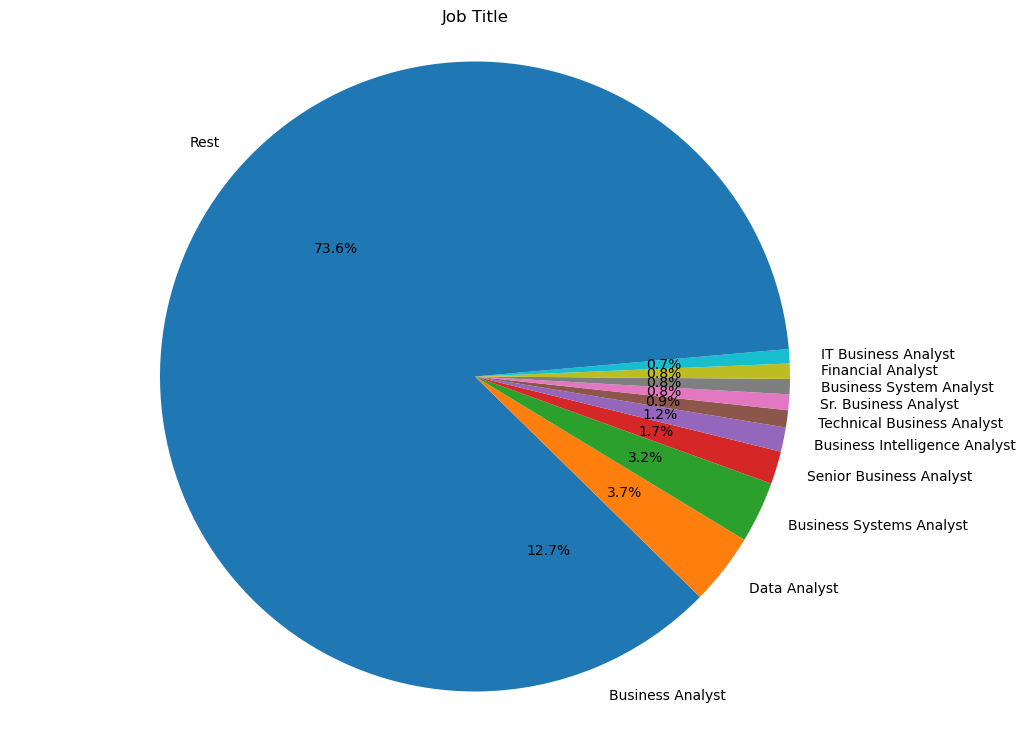

Job Title  Count
162                Business Analyst    518
803                    Data Analyst    150
584        Business Systems Analyst    129
1674        Senior Business Analyst     69
479   Business Intelligence Analyst     51
1970     Technical Business Analyst     36
1858           Sr. Business Analyst     33
574         Business System Analyst     32
1000              Financial Analyst     32
1107            IT Business Analyst     30

In [154]:
# Extracting Job Title
Data3_Job_Title = Data3.groupby(Data3['Job Title']).size().reset_index(name='Count')
Top10 = Data3_Job_Title.nlargest(10, 'Count')
Rest_sum = Data3_Job_Title['Count'].sum() - Top10['Count'].sum()
Rest = pd.DataFrame({'Job Title': ['Rest'], 'Count': [Rest_sum]})
pie_data = pd.concat([Top10, Rest], ignore_index=True)
plt.figure(figsize=(12, 9))
plt.pie(pie_data['Count'], labels=pie_data['Job Title'], autopct='%1.1f%%', startangle=-90)
plt.title('Job Title')
plt.axis('equal')  
plt.show()
Data3_Job_Title.sort_values('Count', ascending=False).head(10)

Most 2 popular jobs are *Buisness Analyst* and *Data Analyst*

### 3.3.2

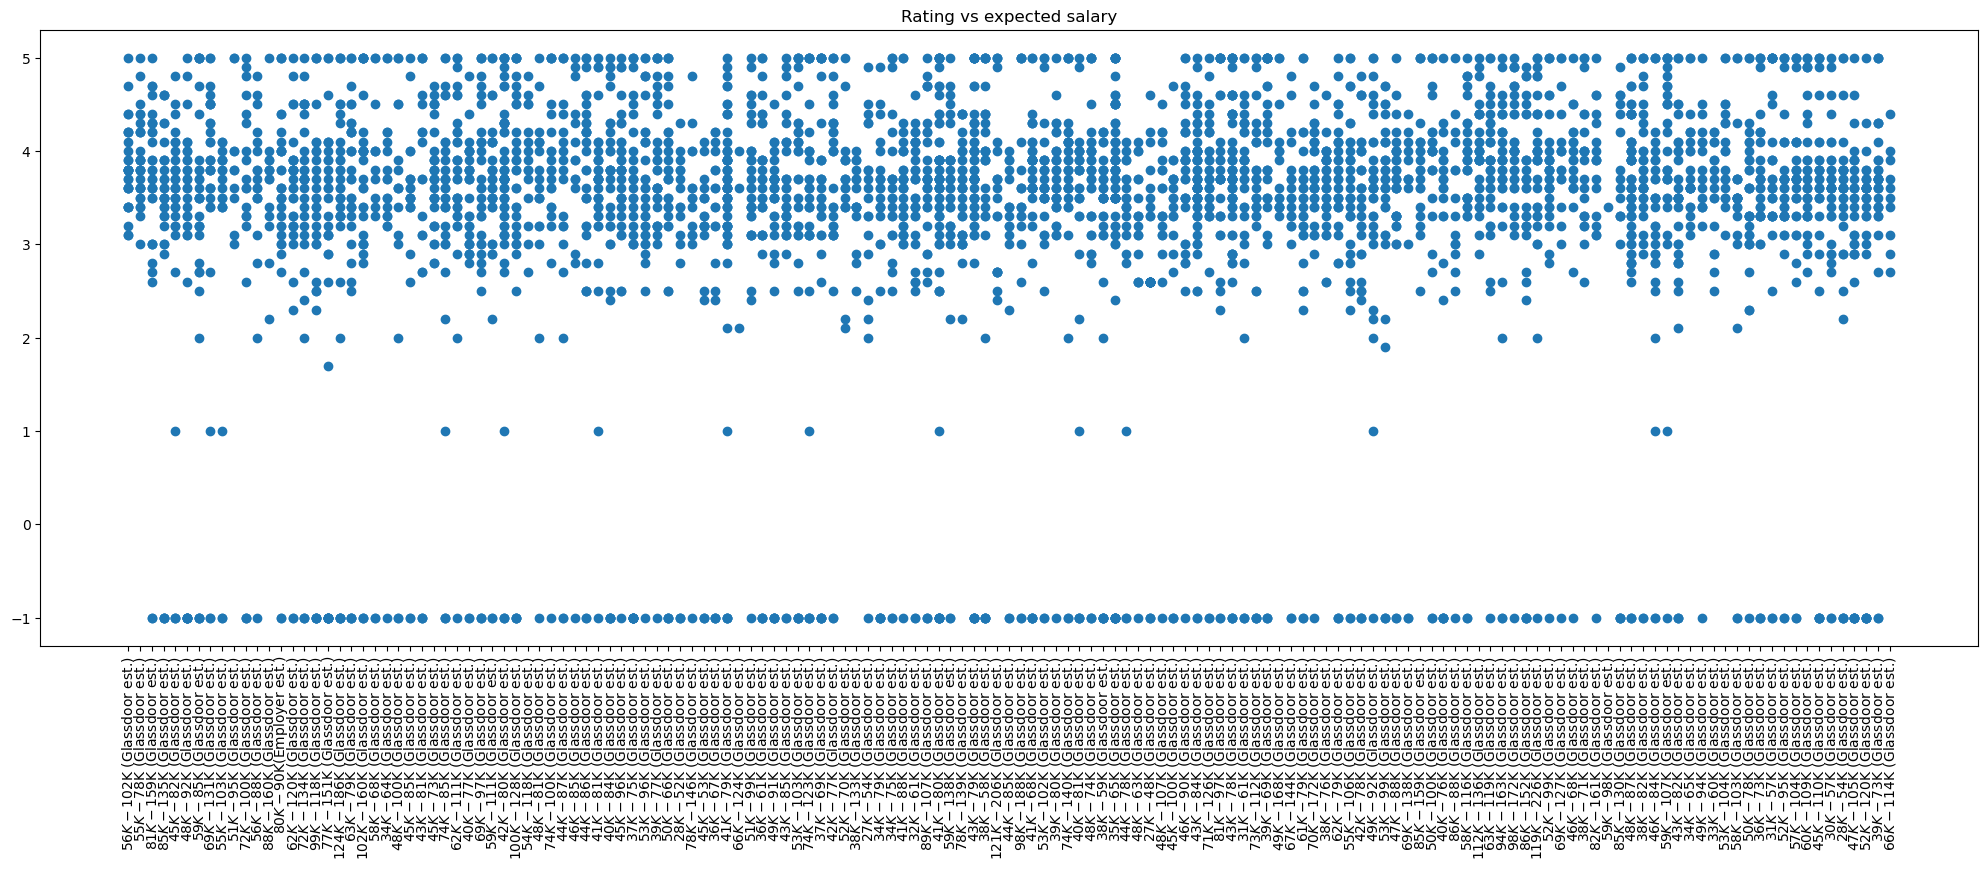

In [164]:
# Rating vs expected salary
plt.figure(figsize = (25, 8))
plt.xticks(rotation = 90)
plt.title('Rating vs expected salary')
plt.scatter(Data3['expected salary'], Data3['Rating'])
plt.show()

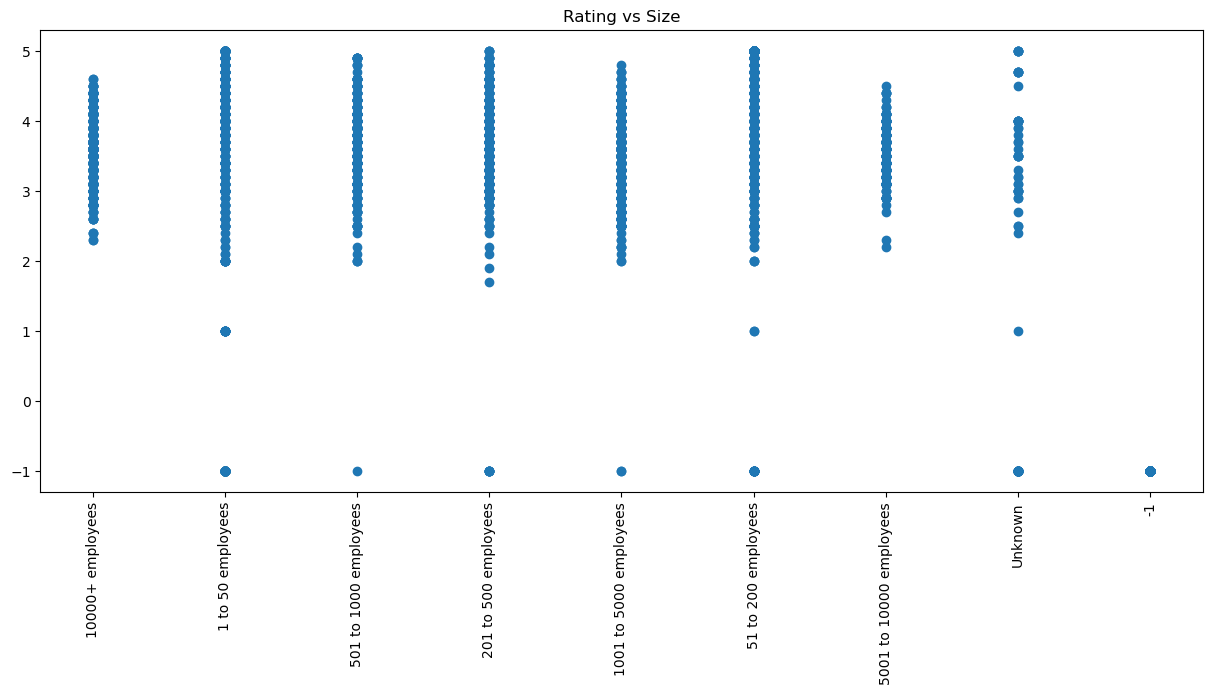

In [165]:
# Rating vs Size
plt.figure(figsize = (15, 6))
plt.xticks(rotation = 90)
plt.title('Rating vs Size')
plt.scatter(Data3['Size'], Data3['Rating'])
plt.show()

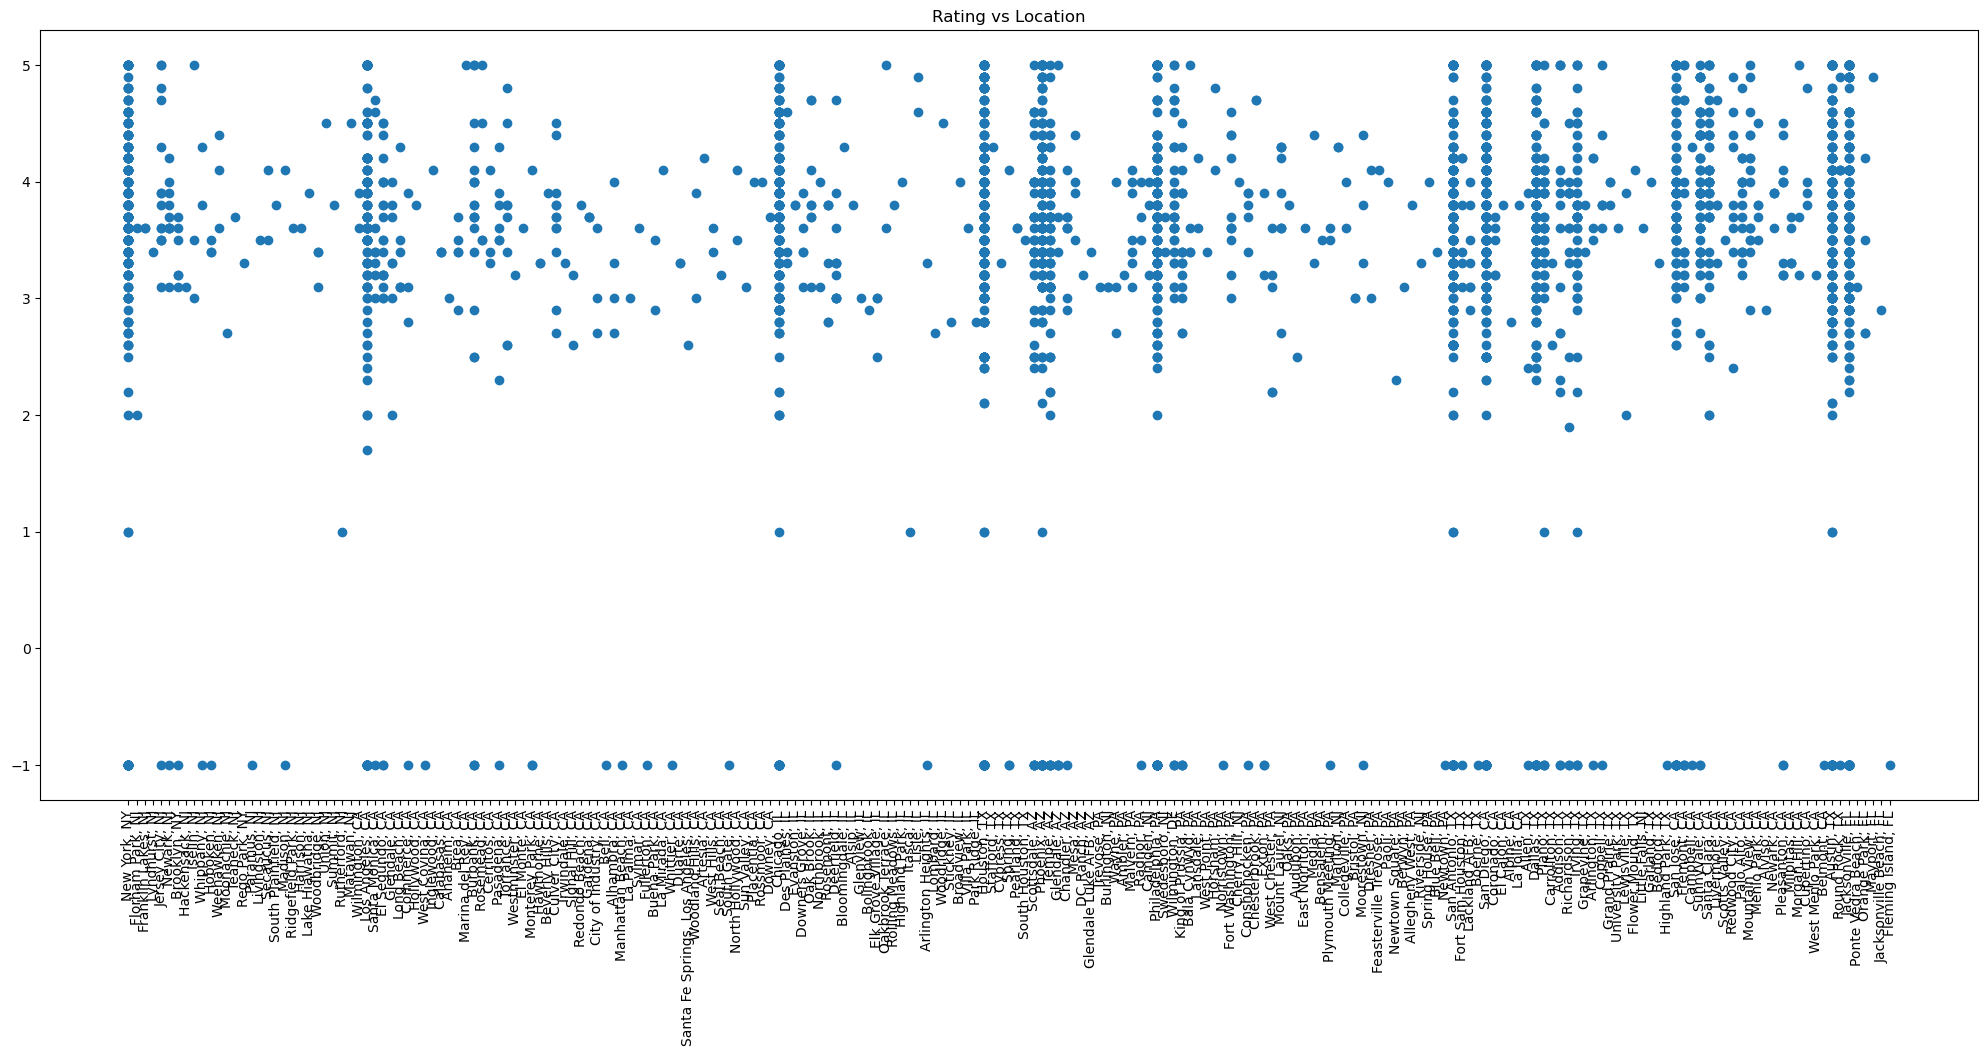

In [166]:
# Rating vs Location
plt.figure(figsize = (25, 10))
plt.xticks(rotation = 90)
plt.title('Rating vs Location')
plt.scatter(Data3['Location'], Data3['Rating'])
plt.show()

### 3.3.3

In [168]:
from scipy.stats import pearsonr
average_salary = []
for temp in Data3["expected salary"]:
    a = float(temp.split("K")[0][1:])
    b = float(temp.split("K")[1][2:])
    average_salary.append((a+b)/2)

# Calculate correlation for Rating vs Expected Salary
corr_salary, _ = pearsonr(average_salary, Data3['Rating'])
print(f"Corr(Rating, expected salary): {corr_salary:.2f}")

Corr(Rating, expected salary): 0.04


### 3.3.4

As you can see in the previous part,`Rating` which is a measure of satisfaction with the job is slightly straight related to given salary which is observed as `expected salary`


### 3.3.5

In [191]:
# corpus file
adjectivesDir = os.path.join(Data3Dir,'adjectives.txt')
with open(adjectivesDir, 'r') as file:
    adjectives = set(file.read().splitlines())  # Assuming each adjective is on a new line
#Append all
all_words = ' '.join(Data3['Job Description']).split()
#Filter
filtered_adjectives = [word for word in all_words if word.lower() in adjectives]
filtered_adjectives_df = pd.DataFrame(filtered_adjectives, columns=['Adjectives'])
# np.unique(filtered_adjectives_df)
filtered_adjectives_df.groupby('Adjectives').size().reset_index(name='Count').sort_values('Count')

Adjectives  Count
0          ABLE      1
953    Thematic      1
955       Thick      1
967   Traumatic      1
968      Tribal      1
...         ...    ...
2380       that   6814
2568       work   7186
1992        our   7244
1203   business  16417
2381        the  44893

[2579 rows x 2 columns]

### 3.3.6

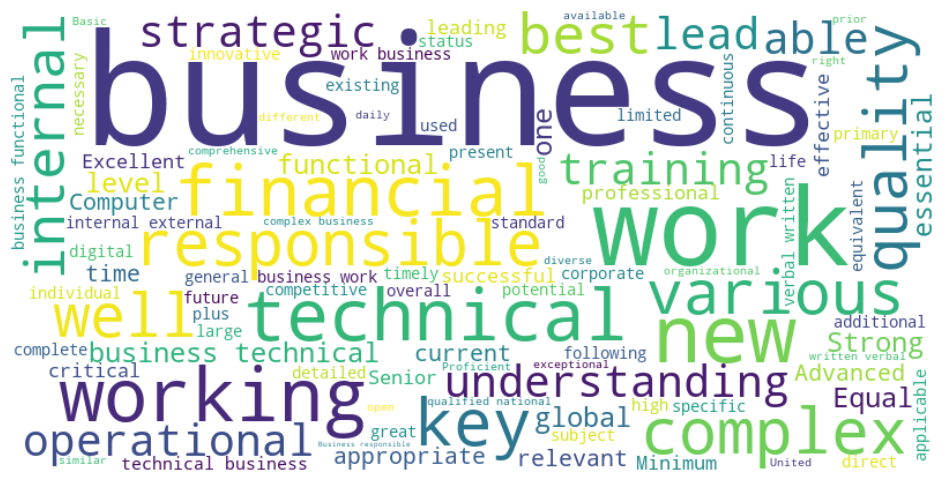

In [201]:
import wordcloud

# Create WordCloud object
wc = wordcloud.WordCloud(width=800, height=400, background_color='white', max_words=100)

# Generate word cloud
wc.generate(' '.join(filtered_adjectives_df['Adjectives']))

# Display word cloud
plt.figure(figsize = [18, 6])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

To hold an Analyst position in the US, candidates typically need a combination of technical skills, analytical abilities, and soft skills. Here are the main capabilities:

### 1. **Analytical Skills**
   - Ability to analyze data and identify trends.
   - Critical thinking to solve complex problems.

### 2. **Technical Proficiency**
   - **Data Analysis Tools**: Proficiency in tools like Excel, SQL, R, or Python for data manipulation and analysis.
   - **Statistical Knowledge**: Understanding of statistical methods and techniques.
   - **Data Visualization**: Familiarity with visualization tools like Tableau, Power BI, or similar software.

### 3. **Industry Knowledge**
   - Understanding of the specific industry (e.g., finance, healthcare, marketing) relevant to the analyst role.
   - Awareness of market trends and economic factors affecting the industry.

### 4. **Communication Skills**
   - Ability to present findings clearly and concisely to stakeholders.
   - Strong written communication skills for reports and documentation.

### 5. **Problem-Solving Skills**
   - Capability to approach problems methodically and develop actionable solutions.
   - Creativity in finding innovative ways to analyze data and present insights.

### 6. **Attention to Detail**
   - Thoroughness in data analysis to avoid errors and ensure accuracy.
   - Ability to spot discrepancies and anomalies in data sets.

### 7. **Project Management Skills**
   - Ability to manage multiple tasks and projects simultaneously.
   - Time management skills to meet deadlines effectively.

### 8. **Teamwork and Collaboration**
   - Ability to work well in a team environment and collaborate with cross-functional teams.
   - Flexibility to 

These capabilities can vary based on the specific analyst role (e.g., Business Analyst, Data Analyst, Financial Analyst), but possessing a strong foundation in these areas will significantly enhance a candidate's prospects in the job market.

**Explain your approach and assumptions once this section is completed.**

# 4. Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

*Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.*

## 1.Loading Phase

In [134]:
NoteBookDir = os.getcwd()
DataDir = os.path.join(NoteBookDir,'data')
Data4Dir = os.path.join(DataDir,'Q4','covid','covid-19-polls-master')
# covid_approval_polls
covid_approval_polls_Dir = os.path.join(Data4Dir,'covid_approval_polls.csv')
covid_approval_polls = pd.read_csv(covid_approval_polls_Dir)
covid_approval_polls['start_date'] = pd.to_datetime(covid_approval_polls['start_date'])
# Splitting 4 groups
PartyAll = covid_approval_polls[covid_approval_polls['party'] == 'all']
PartyRep = covid_approval_polls[covid_approval_polls['party'] == 'R']
PartyDem = covid_approval_polls[covid_approval_polls['party'] == 'D']
PartyInd = covid_approval_polls[covid_approval_polls['party'] == 'I']
covid_approval_polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   start_date   3789 non-null   datetime64[ns]
 1   end_date     3789 non-null   object        
 2   pollster     3789 non-null   object        
 3   sponsor      2050 non-null   object        
 4   sample_size  3758 non-null   float64       
 5   population   3789 non-null   object        
 6   party        3789 non-null   object        
 7   subject      3789 non-null   object        
 8   tracking     3769 non-null   object        
 9   text         3787 non-null   object        
 10  approve      3786 non-null   float64       
 11  disapprove   3774 non-null   float64       
 12  url          3789 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 384.9+ KB


In [4]:
# covid_approval_polls_adjusted
covid_approval_polls_adjusted_Dir = os.path.join(Data4Dir,'covid_approval_polls_adjusted.csv')
covid_approval_polls_adjusted = pd.read_csv(covid_approval_polls_adjusted_Dir)
covid_approval_polls_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              3739 non-null   object 
 1   modeldate            3739 non-null   object 
 2   party                3739 non-null   object 
 3   startdate            3739 non-null   object 
 4   enddate              3739 non-null   object 
 5   pollster             3739 non-null   object 
 6   grade                3459 non-null   object 
 7   samplesize           3739 non-null   float64
 8   population           3739 non-null   object 
 9   weight               3739 non-null   float64
 10  influence            3739 non-null   float64
 11  multiversions        8 non-null      object 
 12  tracking             242 non-null    object 
 13  approve              3736 non-null   float64
 14  disapprove           3724 non-null   float64
 15  approve_adjusted     3736 non-null   f

In [5]:
# covid_approval_toplines
covid_approval_toplines_Dir = os.path.join(Data4Dir,'covid_approval_toplines.csv')
covid_approval_toplines = pd.read_csv(covid_approval_toplines_Dir)
covid_approval_toplines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              5377 non-null   object 
 1   modeldate            5377 non-null   object 
 2   party                5377 non-null   object 
 3   approve_estimate     5377 non-null   float64
 4   disapprove_estimate  5377 non-null   float64
 5   timestamp            5377 non-null   object 
dtypes: float64(2), object(4)
memory usage: 252.2+ KB


In [109]:
# covid_concern_polls
covid_concern_polls_Dir = os.path.join(Data4Dir,'covid_concern_polls.csv')
covid_concern_polls = pd.read_csv(covid_concern_polls_Dir)
covid_concern_polls['start_date'] = pd.to_datetime(covid_concern_polls['start_date'])
# Slpitting 2 groups
Infection_concern = covid_concern_polls[covid_concern_polls['subject'].str[8:] == 'infected']
Economy_concern = covid_concern_polls[covid_concern_polls['subject'].str[8:] == 'economy']
covid_concern_polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   start_date   678 non-null    datetime64[ns]
 1   end_date     678 non-null    object        
 2   pollster     678 non-null    object        
 3   sponsor      270 non-null    object        
 4   sample_size  678 non-null    int64         
 5   population   678 non-null    object        
 6   party        678 non-null    object        
 7   subject      678 non-null    object        
 8   tracking     678 non-null    bool          
 9   text         678 non-null    object        
 10  very         678 non-null    float64       
 11  somewhat     677 non-null    float64       
 12  not_very     678 non-null    float64       
 13  not_at_all   671 non-null    float64       
 14  url          678 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1), obje

In [7]:
# covid_concern_polls_adjusted
covid_concern_polls_adjusted_Dir = os.path.join(Data4Dir,'covid_concern_polls_adjusted.csv')
covid_concern_polls_adjusted = pd.read_csv(covid_concern_polls_adjusted_Dir)
covid_concern_polls_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              601 non-null    object 
 1   modeldate            601 non-null    object 
 2   party                601 non-null    object 
 3   startdate            601 non-null    object 
 4   enddate              601 non-null    object 
 5   pollster             601 non-null    object 
 6   grade                571 non-null    object 
 7   samplesize           601 non-null    float64
 8   population           601 non-null    object 
 9   weight               601 non-null    float64
 10  influence            601 non-null    float64
 11  multiversions        0 non-null      float64
 12  tracking             99 non-null     object 
 13  very                 601 non-null    float64
 14  somewhat             600 non-null    float64
 15  not_very             601 non-null    flo

In [8]:
# covid_concern_toplines
covid_concern_toplines_Dir = os.path.join(Data4Dir,'covid_concern_toplines.csv')
covid_concern_toplines = pd.read_csv(covid_concern_toplines_Dir)
covid_concern_toplines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              1496 non-null   object 
 1   modeldate            1496 non-null   object 
 2   party                1496 non-null   object 
 3   very_estimate        1496 non-null   float64
 4   somewhat_estimate    1496 non-null   float64
 5   not_very_estimate    1496 non-null   float64
 6   not_at_all_estimate  1496 non-null   float64
 7   timestamp            1496 non-null   object 
dtypes: float64(4), object(4)
memory usage: 93.6+ KB


## 2. Americans approval of the president’s covid handling

### Biden

In [100]:
# Approval
BiApp = covid_approval_polls[(covid_approval_polls['subject'] == 'Biden') & (covid_approval_polls['start_date'] > pd.to_datetime('2021-1-22'))][['start_date','approve']]

BiApp['day'] = BiApp.start_date.apply(lambda x: x.day)
BiApp['month'] = BiApp.start_date.apply(lambda x: x.month)
BiApp['year'] = BiApp.start_date.apply(lambda x: x.year)

BiApp['start_date'] = BiApp['month'].astype('str').str[:] + "-" \
+ BiApp['day'].astype('str').str[:] + "-" + BiApp['year'].astype('str').str[:]

BiApp['start_date'] = pd.to_datetime(BiApp['start_date']) 
BiApp.sort_values('start_date', ascending = True, inplace = True)
BiApp

start_date  approve  day  month  year
2232 2021-01-24     52.0   24      1  2021
2233 2021-01-24     24.0   24      1  2021
2234 2021-01-24     84.0   24      1  2021
2235 2021-01-24     46.0   24      1  2021
2237 2021-01-27     56.0   27      1  2021
...         ...      ...  ...    ...   ...
3783 2022-09-14     72.0   14      9  2022
3786 2022-09-16     17.0   16      9  2022
3787 2022-09-16     85.0   16      9  2022
3785 2022-09-16     51.0   16      9  2022
3788 2022-09-16     42.0   16      9  2022

[1560 rows x 5 columns]

In [101]:
# Disapproval
BiDis = covid_approval_polls[(covid_approval_polls['subject'] == 'Biden') & (covid_approval_polls['start_date'] > pd.to_datetime('2021-1-22'))][['start_date','disapprove']]
BiDis['day'] = BiDis.start_date.apply(lambda x: x.day)
BiDis['month'] = BiDis.start_date.apply(lambda x: x.month)
BiDis['year'] = BiDis.start_date.apply(lambda x: x.year)

BiDis['start_date'] = BiDis['month'].astype('str').str[:] + "-" \
+ BiDis['day'].astype('str').str[:] + "-" + BiDis['year'].astype('str').str[:]

BiDis['start_date'] = pd.to_datetime(BiDis['start_date']) 
BiDis.sort_values('start_date', ascending = True, inplace = True)
BiDis

start_date  disapprove  day  month  year
2232 2021-01-24        27.0   24      1  2021
2233 2021-01-24        54.0   24      1  2021
2234 2021-01-24         3.0   24      1  2021
2235 2021-01-24        25.0   24      1  2021
2237 2021-01-27        21.0   27      1  2021
...         ...         ...  ...    ...   ...
3783 2022-09-14        13.0   14      9  2022
3786 2022-09-16        76.0   16      9  2022
3787 2022-09-16        10.0   16      9  2022
3785 2022-09-16        43.0   16      9  2022
3788 2022-09-16        51.0   16      9  2022

[1560 rows x 5 columns]

In [98]:
# Aggregating
grouped = BiApp.groupby('start_date')

dates_App = []
approved = []

for item in grouped:
    dates_App.append(item[0])
    approved.append(item[1].approve.mean())

grouped = BiDis.groupby('start_date')

dates_Dis = []
Dis_approved = []

for item in grouped:
    dates_Dis.append(item[0])
    Dis_approved.append(item[1].disapprove.mean())

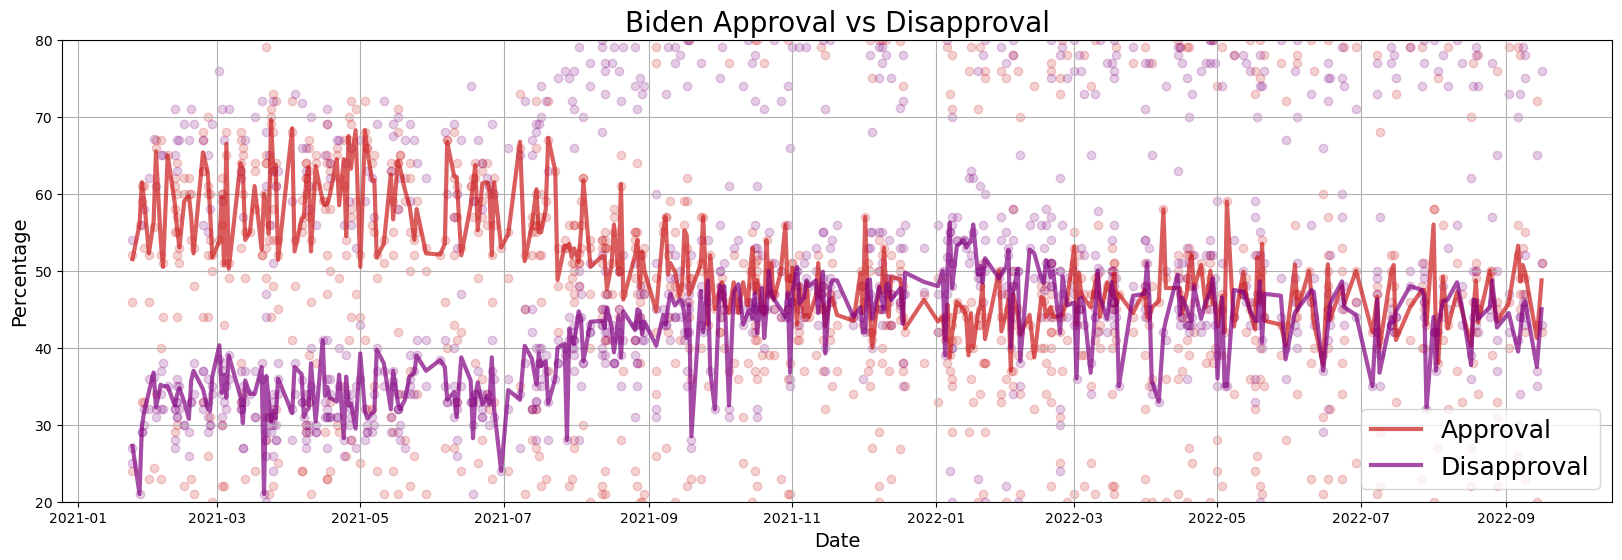

In [99]:
# plotting
plt.figure(figsize=(20,6))
plt.grid('major', axis = 'both')
plt.ylim((20,80))

plt.plot(dates_App, approved, color = (0.8, 0.1, 0.1, 0.7), linewidth= 3, label = 'Approval')
plt.scatter(BiApp.start_date, BiApp.approve, color = (0.8, 0.1, 0.1, 0.2))

plt.scatter(BiDis.start_date, BiDis.disapprove, color = (0.5, 0, 0.5, 0.2))
plt.plot(dates_Dis, Dis_approved, color = (0.5, 0, 0.5, 0.7), linewidth= 3, label = 'Disapproval')

plt.title('Biden Approval vs Disapproval', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(fontsize = 18)
plt.show()

### Trump 

In [103]:
# Approval
TrApp = covid_approval_polls[(covid_approval_polls['subject'] == 'Trump') & (covid_approval_polls['start_date'] > pd.to_datetime('2020-2-22'))][['start_date','approve']]

TrApp['day'] = TrApp.start_date.apply(lambda x: x.day)
TrApp['month'] = TrApp.start_date.apply(lambda x: x.month)
TrApp['year'] = TrApp.start_date.apply(lambda x: x.year)

TrApp['start_date'] = TrApp['month'].astype('str').str[:] + "-" \
+ TrApp['day'].astype('str').str[:] + "-" + TrApp['year'].astype('str').str[:]

TrApp['start_date'] = pd.to_datetime(TrApp['start_date']) 
TrApp.sort_values('start_date', ascending = True, inplace = True)
TrApp

start_date  approve  day  month  year
20   2020-02-23     39.0   23      2  2020
21   2020-02-23     77.0   23      2  2020
22   2020-02-23     14.0   23      2  2020
23   2020-02-23     34.0   23      2  2020
24   2020-02-24     54.0   24      2  2020
...         ...      ...  ...    ...   ...
2224 2021-01-16     11.0   16      1  2021
2219 2021-01-16     59.0   16      1  2021
2218 2021-01-16     29.0   16      1  2021
2220 2021-01-16      1.0   16      1  2021
2225 2021-01-16     38.0   16      1  2021

[2206 rows x 5 columns]

In [104]:
# Disapproval
TrDis = covid_approval_polls[(covid_approval_polls['subject'] == 'Trump') & (covid_approval_polls['start_date'] > pd.to_datetime('2020-2-22'))][['start_date','disapprove']]
TrDis['day'] = TrDis.start_date.apply(lambda x: x.day)
TrDis['month'] = TrDis.start_date.apply(lambda x: x.month)
TrDis['year'] = TrDis.start_date.apply(lambda x: x.year)

TrDis['start_date'] = TrDis['month'].astype('str').str[:] + "-" \
+ TrDis['day'].astype('str').str[:] + "-" + TrDis['year'].astype('str').str[:]

TrDis['start_date'] = pd.to_datetime(TrDis['start_date']) 
TrDis.sort_values('start_date', ascending = True, inplace = True)
TrDis

start_date  disapprove  day  month  year
20   2020-02-23        31.0   23      2  2020
21   2020-02-23         7.0   23      2  2020
22   2020-02-23        56.0   23      2  2020
23   2020-02-23        26.0   23      2  2020
24   2020-02-24        27.0   24      2  2020
...         ...         ...  ...    ...   ...
2224 2021-01-16        87.0   16      1  2021
2219 2021-01-16        35.0   16      1  2021
2218 2021-01-16        68.0   16      1  2021
2220 2021-01-16        97.0   16      1  2021
2225 2021-01-16        50.0   16      1  2021

[2206 rows x 5 columns]

In [105]:
# Aggregating
grouped = TrApp.groupby('start_date')

dates_App = []
approved = []

for item in grouped:
    dates_App.append(item[0])
    approved.append(item[1].approve.mean())

grouped = TrDis.groupby('start_date')

dates_Dis = []
Dis_approved = []

for item in grouped:
    dates_Dis.append(item[0])
    Dis_approved.append(item[1].disapprove.mean())

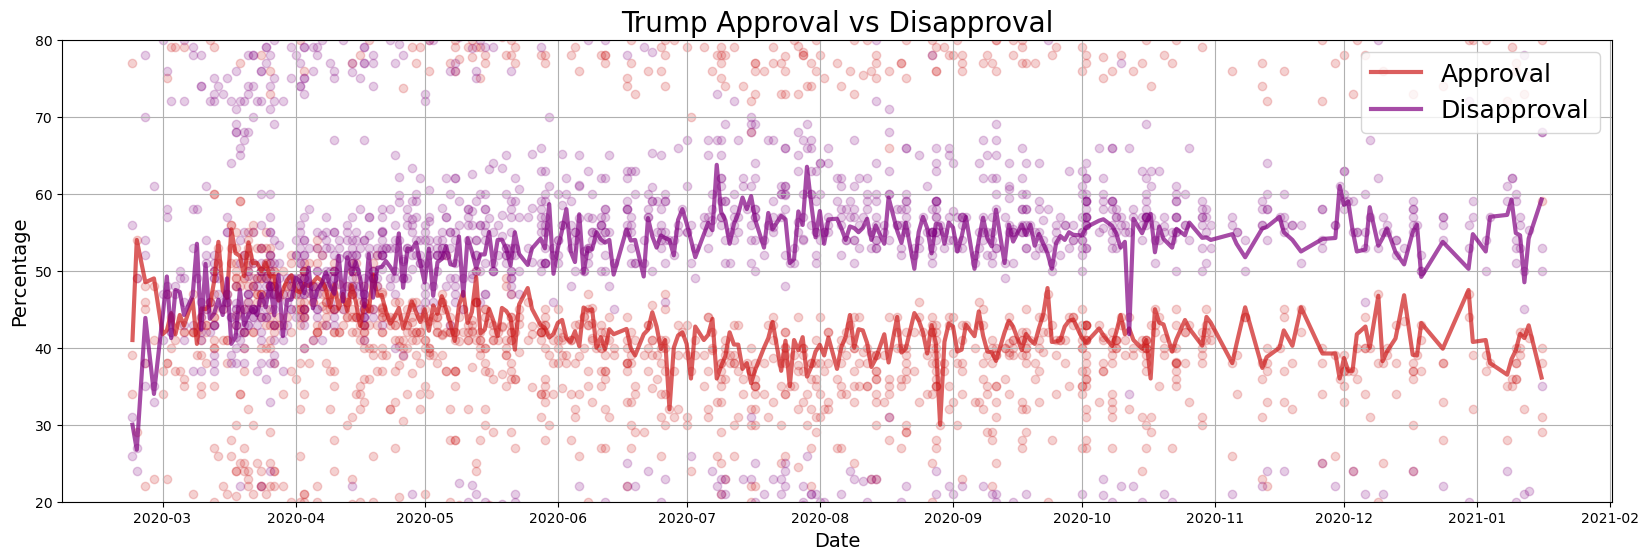

In [106]:
# plotting
plt.figure(figsize=(20,6))
plt.grid('major', axis = 'both')
plt.ylim((20,80))

plt.plot(dates_App, approved, color = (0.8, 0.1, 0.1, 0.7), linewidth= 3, label = 'Approval')
plt.scatter(TrApp.start_date, TrApp.approve, color = (0.8, 0.1, 0.1, 0.2))

plt.scatter(TrDis.start_date, TrDis.disapprove, color = (0.5, 0, 0.5, 0.2))
plt.plot(dates_Dis, Dis_approved, color = (0.5, 0, 0.5, 0.7), linewidth= 3, label = 'Disapproval')

plt.title('Trump Approval vs Disapproval', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(fontsize = 18)
plt.show()

## 3. Different parties approval of president's covid handling

### Biden

In [152]:
# All
BiAll = PartyAll[(PartyAll['subject'] == 'Biden') & (PartyAll['start_date'] > pd.to_datetime('2021-4-1'))][['start_date','approve']]

BiAll['day'] = BiAll.start_date.apply(lambda x: x.day)
BiAll['month'] = BiAll.start_date.apply(lambda x: x.month)
BiAll['year'] = BiAll.start_date.apply(lambda x: x.year)

BiAll['start_date'] = BiAll['month'].astype('str').str[:] + "-" \
+ BiAll['day'].astype('str').str[:] + "-" + BiAll['year'].astype('str').str[:]

BiAll['start_date'] = pd.to_datetime(BiAll['start_date']) 
BiAll.sort_values('start_date', ascending = True, inplace = True)
BiAll

start_date  approve  day  month  year
2418 2021-04-02    68.00    2      4  2021
2422 2021-04-03    54.00    3      4  2021
2426 2021-04-06    59.13    6      4  2021
2429 2021-04-06    56.00    6      4  2021
2433 2021-04-07    57.00    7      4  2021
...         ...      ...  ...    ...   ...
3773 2022-09-08    53.00    8      9  2022
3769 2022-09-09    49.00    9      9  2022
3777 2022-09-09    55.00    9      9  2022
3781 2022-09-14    43.00   14      9  2022
3785 2022-09-16    51.00   16      9  2022

[397 rows x 5 columns]

In [153]:
# Rep
BiRep = PartyRep[(PartyRep['subject'] == 'Biden') & (PartyRep['start_date'] > pd.to_datetime('2021-4-1'))][['start_date','approve']]

BiRep['day'] = BiRep.start_date.apply(lambda x: x.day)
BiRep['month'] = BiRep.start_date.apply(lambda x: x.month)
BiRep['year'] = BiRep.start_date.apply(lambda x: x.year)

BiRep['start_date'] = BiRep['month'].astype('str').str[:] + "-" \
+ BiRep['day'].astype('str').str[:] + "-" + BiRep['year'].astype('str').str[:]

BiRep['start_date'] = pd.to_datetime(BiRep['start_date']) 
BiRep.sort_values('start_date', ascending = True, inplace = True)
BiRep

start_date  approve  day  month  year
2419 2021-04-02    41.00    2      4  2021
2423 2021-04-03    18.00    3      4  2021
2427 2021-04-06    24.02    6      4  2021
2430 2021-04-06    24.00    6      4  2021
2440 2021-04-08    30.00    8      4  2021
...         ...      ...  ...    ...   ...
3774 2022-09-08    18.00    8      9  2022
3770 2022-09-09    14.00    9      9  2022
3778 2022-09-09    23.00    9      9  2022
3782 2022-09-14    20.00   14      9  2022
3786 2022-09-16    17.00   16      9  2022

[327 rows x 5 columns]

In [154]:
# Dem
BiDem = PartyDem[(PartyDem['subject'] == 'Biden') & (PartyDem['start_date'] > pd.to_datetime('2021-4-1'))][['start_date','approve']]

BiDem['day'] = BiDem.start_date.apply(lambda x: x.day)
BiDem['month'] = BiDem.start_date.apply(lambda x: x.month)
BiDem['year'] = BiDem.start_date.apply(lambda x: x.year)

BiDem['start_date'] = BiDem['month'].astype('str').str[:] + "-" \
+ BiDem['day'].astype('str').str[:] + "-" + BiDem['year'].astype('str').str[:]

BiDem['start_date'] = pd.to_datetime(BiDem['start_date']) 
BiDem.sort_values('start_date', ascending = True, inplace = True)
BiDem

start_date  approve  day  month  year
2420 2021-04-02    93.00    2      4  2021
2424 2021-04-03    90.00    3      4  2021
2428 2021-04-06    90.65    6      4  2021
2431 2021-04-06    88.00    6      4  2021
2441 2021-04-08    95.00    8      4  2021
...         ...      ...  ...    ...   ...
3775 2022-09-08    85.00    8      9  2022
3771 2022-09-09    83.00    9      9  2022
3779 2022-09-09    86.00    9      9  2022
3783 2022-09-14    72.00   14      9  2022
3787 2022-09-16    85.00   16      9  2022

[327 rows x 5 columns]

In [155]:
# Ind
BiInd = PartyInd[(PartyInd['subject'] == 'Biden') & (PartyInd['start_date'] > pd.to_datetime('2021-4-1'))][['start_date','approve']]

BiInd['day'] = BiInd.start_date.apply(lambda x: x.day)
BiInd['month'] = BiInd.start_date.apply(lambda x: x.month)
BiInd['year'] = BiInd.start_date.apply(lambda x: x.year)

BiInd['start_date'] = BiInd['month'].astype('str').str[:] + "-" \
+ BiInd['day'].astype('str').str[:] + "-" + BiInd['year'].astype('str').str[:]

BiInd['start_date'] = pd.to_datetime(BiInd['start_date']) 
BiInd.sort_values('start_date', ascending = True, inplace = True)
BiInd

start_date  approve  day  month  year
2421 2021-04-02     72.0    2      4  2021
2425 2021-04-03     48.0    3      4  2021
2432 2021-04-06     55.0    6      4  2021
2442 2021-04-08     64.0    8      4  2021
2446 2021-04-08     60.0    8      4  2021
...         ...      ...  ...    ...   ...
3776 2022-09-08     47.0    8      9  2022
3772 2022-09-09     42.0    9      9  2022
3780 2022-09-09     46.0    9      9  2022
3784 2022-09-14     30.0   14      9  2022
3788 2022-09-16     42.0   16      9  2022

[324 rows x 5 columns]

In [156]:
# Aggregating All
grouped = BiAll.groupby('start_date')

datesAll = []
approvedAll = []

for item in grouped:
    datesAll.append(item[0])
    approvedAll.append(item[1].approve.mean())
# Aggregating Rep
grouped = BiRep.groupby('start_date')

datesRep = []
approvedRep = []

for item in grouped:
    datesRep.append(item[0])
    approvedRep.append(item[1].approve.mean())
# Aggregating Dem
grouped = BiDem.groupby('start_date')

datesDem = []
approvedDem = []

for item in grouped:
    datesDem.append(item[0])
    approvedDem.append(item[1].approve.mean())
# Aggregating Ind
grouped = BiInd.groupby('start_date')

datesInd = []
approvedInd = []

for item in grouped:
    datesInd.append(item[0])
    approvedInd.append(item[1].approve.mean())

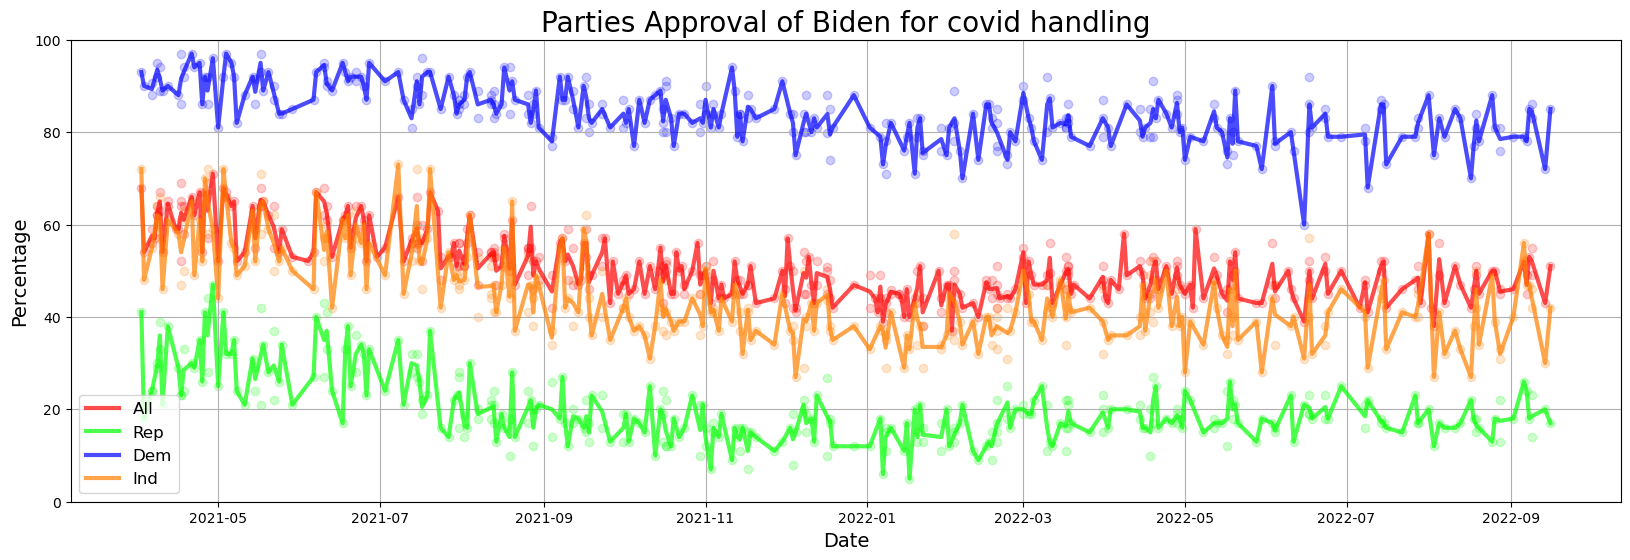

In [157]:
# plotting
plt.figure(figsize=(20,6))
plt.grid('major', axis = 'both')
plt.ylim((0,100))

plt.plot(datesAll, approvedAll, color = (1.0, 0.0, 0.0, 0.7), linewidth= 3, label = 'All')
plt.scatter(BiAll.start_date, BiAll.approve, color = (1.0, 0.0, 0.0, 0.2))

plt.plot(datesRep, approvedRep, color = (0.0, 1.0, 0.0, 0.7), linewidth= 3, label = 'Rep')
plt.scatter(BiRep.start_date, BiRep.approve, color = (0.0, 1.0, 0.0, 0.2))

plt.plot(datesDem, approvedDem, color = (0.0, 0.0, 1.0, 0.7), linewidth= 3, label = 'Dem')
plt.scatter(BiDem.start_date, BiDem.approve, color = (0.0, 0.0, 1.0, 0.2))

plt.plot(datesInd, approvedInd, color = (1.0, 0.5, 0.0, 0.7), linewidth= 3, label = 'Ind')
plt.scatter(BiInd.start_date, BiInd.approve, color = (1.0, 0.5, 0.0, 0.2))

plt.title('Parties Approval of Biden for covid handling', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()

### Trump

In [158]:
# All
TrAll = PartyAll[(PartyAll['subject'] == 'Trump') & (PartyAll['start_date'] > pd.to_datetime('2020-3-1'))][['start_date','approve']]

TrAll['day'] = TrAll.start_date.apply(lambda x: x.day)
TrAll['month'] = TrAll.start_date.apply(lambda x: x.month)
TrAll['year'] = TrAll.start_date.apply(lambda x: x.year)

TrAll['start_date'] = TrAll['month'].astype('str').str[:] + "-" \
+ TrAll['day'].astype('str').str[:] + "-" + TrAll['year'].astype('str').str[:]

TrAll['start_date'] = pd.to_datetime(TrAll['start_date']) 
TrAll.sort_values('start_date', ascending = True, inplace = True)
TrAll

start_date  approve  day  month  year
44   2020-03-02    38.00    2      3  2020
56   2020-03-02    47.00    2      3  2020
48   2020-03-03    44.00    3      3  2020
52   2020-03-04    41.00    4      3  2020
60   2020-03-05    43.00    5      3  2020
...         ...      ...  ...    ...   ...
2202 2021-01-11    40.00   11      1  2021
2214 2021-01-12    42.00   12      1  2021
2198 2021-01-13    41.29   13      1  2021
2218 2021-01-16    29.00   16      1  2021
2222 2021-01-16    40.00   16      1  2021

[668 rows x 5 columns]

In [159]:
# Rep
TrRep = PartyRep[(PartyRep['subject'] == 'Trump') & (PartyRep['start_date'] > pd.to_datetime('2020-3-1'))][['start_date','approve']]

TrRep['day'] = TrRep.start_date.apply(lambda x: x.day)
TrRep['month'] = TrRep.start_date.apply(lambda x: x.month)
TrRep['year'] = TrRep.start_date.apply(lambda x: x.year)

TrRep['start_date'] = TrRep['month'].astype('str').str[:] + "-" \
+ TrRep['day'].astype('str').str[:] + "-" + TrRep['year'].astype('str').str[:]

TrRep['start_date'] = pd.to_datetime(TrRep['start_date']) 
TrRep.sort_values('start_date', ascending = True, inplace = True)
TrRep

start_date  approve  day  month  year
45   2020-03-02    75.00    2      3  2020
57   2020-03-02    86.00    2      3  2020
49   2020-03-03    79.00    3      3  2020
53   2020-03-04    79.00    4      3  2020
61   2020-03-05    87.00    5      3  2020
...         ...      ...  ...    ...   ...
2203 2021-01-11    82.00   11      1  2021
2215 2021-01-12    73.00   12      1  2021
2199 2021-01-13    75.34   13      1  2021
2219 2021-01-16    59.00   16      1  2021
2223 2021-01-16    80.00   16      1  2021

[515 rows x 5 columns]

In [160]:
# Dem
TrDem = PartyDem[(PartyDem['subject'] == 'Trump') & (PartyDem['start_date'] > pd.to_datetime('2020-3-1'))][['start_date','approve']]

TrDem['day'] = TrDem.start_date.apply(lambda x: x.day)
TrDem['month'] = TrDem.start_date.apply(lambda x: x.month)
TrDem['year'] = TrDem.start_date.apply(lambda x: x.year)

TrDem['start_date'] = TrDem['month'].astype('str').str[:] + "-" \
+ TrDem['day'].astype('str').str[:] + "-" + TrDem['year'].astype('str').str[:]

TrDem['start_date'] = pd.to_datetime(TrDem['start_date']) 
TrDem.sort_values('start_date', ascending = True, inplace = True)
TrDem

start_date  approve  day  month  year
46   2020-03-02    15.00    2      3  2020
58   2020-03-02    16.00    2      3  2020
50   2020-03-03    15.00    3      3  2020
54   2020-03-04    10.00    4      3  2020
62   2020-03-05    10.00    5      3  2020
...         ...      ...  ...    ...   ...
2204 2021-01-11     6.00   11      1  2021
2216 2021-01-12    18.00   12      1  2021
2200 2021-01-13    12.09   13      1  2021
2220 2021-01-16     1.00   16      1  2021
2224 2021-01-16    11.00   16      1  2021

[515 rows x 5 columns]

In [161]:
# Ind
TrInd = PartyInd[(PartyInd['subject'] == 'Trump') & (PartyInd['start_date'] > pd.to_datetime('2020-3-1'))][['start_date','approve']]

TrInd['day'] = TrInd.start_date.apply(lambda x: x.day)
TrInd['month'] = TrInd.start_date.apply(lambda x: x.month)
TrInd['year'] = TrInd.start_date.apply(lambda x: x.year)

TrInd['start_date'] = TrInd['month'].astype('str').str[:] + "-" \
+ TrInd['day'].astype('str').str[:] + "-" + TrInd['year'].astype('str').str[:]

TrInd['start_date'] = pd.to_datetime(TrInd['start_date']) 
TrInd.sort_values('start_date', ascending = True, inplace = True)
TrInd

start_date  approve  day  month  year
47   2020-03-02     23.0    2      3  2020
59   2020-03-02     38.0    2      3  2020
51   2020-03-03     40.0    3      3  2020
55   2020-03-04     37.0    4      3  2020
63   2020-03-05     37.0    5      3  2020
...         ...      ...  ...    ...   ...
2196 2021-01-10     36.0   10      1  2021
2205 2021-01-11     42.0   11      1  2021
2217 2021-01-12     32.0   12      1  2021
2221 2021-01-16     31.0   16      1  2021
2225 2021-01-16     38.0   16      1  2021

[484 rows x 5 columns]

In [162]:
# Aggregating All
grouped = TrAll.groupby('start_date')

datesAll = []
approvedAll = []

for item in grouped:
    datesAll.append(item[0])
    approvedAll.append(item[1].approve.mean())
# Aggregating Rep
grouped = TrRep.groupby('start_date')

datesRep = []
approvedRep = []

for item in grouped:
    datesRep.append(item[0])
    approvedRep.append(item[1].approve.mean())
# Aggregating Dem
grouped = TrDem.groupby('start_date')

datesDem = []
approvedDem = []

for item in grouped:
    datesDem.append(item[0])
    approvedDem.append(item[1].approve.mean())
# Aggregating Ind
grouped = TrInd.groupby('start_date')

datesInd = []
approvedInd = []

for item in grouped:
    datesInd.append(item[0])
    approvedInd.append(item[1].approve.mean())

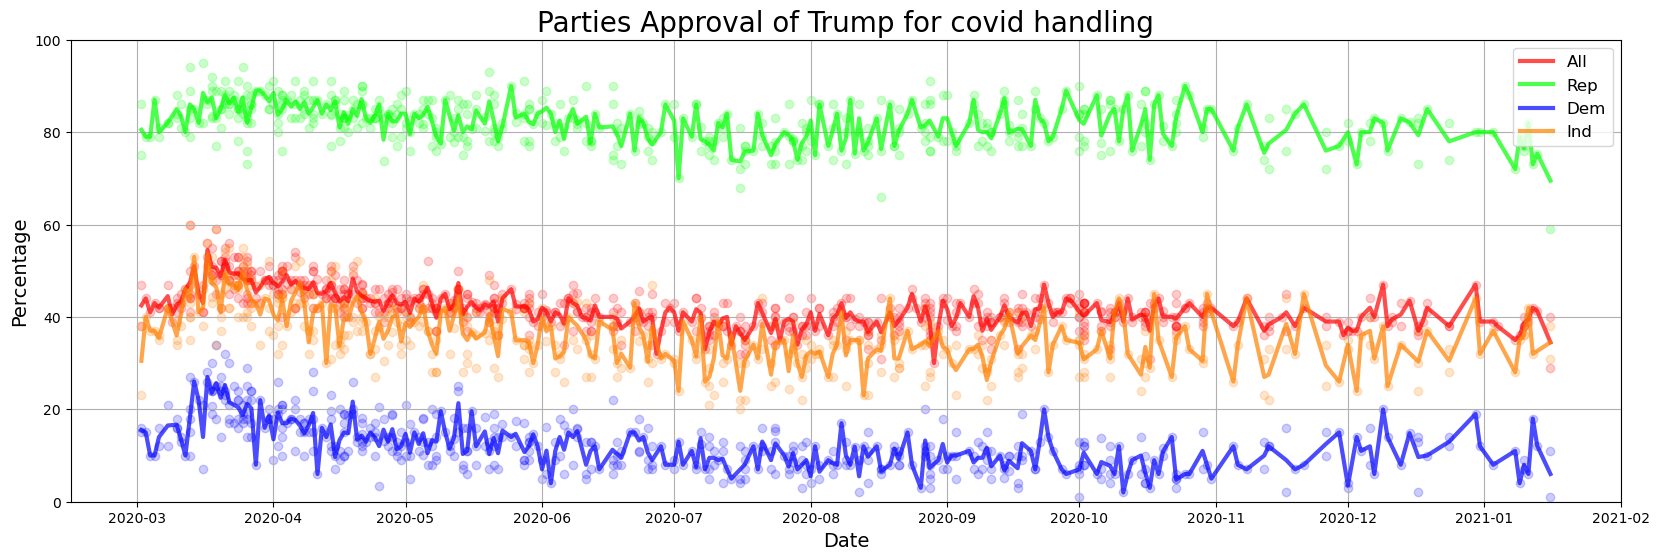

In [163]:
# plotting
plt.figure(figsize=(20,6))
plt.grid('major', axis = 'both')
plt.ylim((0,100))

plt.plot(datesAll, approvedAll, color = (1.0, 0.0, 0.0, 0.7), linewidth= 3, label = 'All')
plt.scatter(TrAll.start_date, TrAll.approve, color = (1.0, 0.0, 0.0, 0.2))

plt.plot(datesRep, approvedRep, color = (0.0, 1.0, 0.0, 0.7), linewidth= 3, label = 'Rep')
plt.scatter(TrRep.start_date, TrRep.approve, color = (0.0, 1.0, 0.0, 0.2))

plt.plot(datesDem, approvedDem, color = (0.0, 0.0, 1.0, 0.7), linewidth= 3, label = 'Dem')
plt.scatter(TrDem.start_date, TrDem.approve, color = (0.0, 0.0, 1.0, 0.2))

plt.plot(datesInd, approvedInd, color = (1.0, 0.5, 0.0, 0.7), linewidth= 3, label = 'Ind')
plt.scatter(TrInd.start_date, TrInd.approve, color = (1.0, 0.5, 0.0, 0.2))

plt.title('Parties Approval of Trump for covid handling', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()

## 4. How worried are Americans about infection?

In [126]:
# Very
InfVery = Infection_concern[Infection_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date','very']]

InfVery['day'] = InfVery.start_date.apply(lambda x: x.day)
InfVery['month'] = InfVery.start_date.apply(lambda x: x.month)
InfVery['year'] = InfVery.start_date.apply(lambda x: x.year)

InfVery['start_date'] = InfVery['month'].astype('str').str[:] + "-" \
+ InfVery['day'].astype('str').str[:] + "-" + InfVery['year'].astype('str').str[:]

InfVery['start_date'] = pd.to_datetime(InfVery['start_date']) 
InfVery.sort_values('start_date', ascending = True, inplace = True)
InfVery

start_date   very  day  month  year
2   2020-02-02  13.00    2      2  2020
4   2020-02-07  11.00    7      2  2020
5   2020-02-09  11.00    9      2  2020
6   2020-02-13  22.00   13      2  2020
8   2020-02-13  22.00   13      2  2020
..         ...    ...  ...    ...   ...
672 2021-04-03  18.00    3      4  2021
673 2021-04-06  22.34    6      4  2021
674 2021-04-09  20.00    9      4  2021
675 2021-04-10  16.00   10      4  2021
676 2021-04-17  20.00   17      4  2021

[466 rows x 5 columns]

In [112]:
# somewhat
Infsomewhat = Infection_concern[Infection_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date','somewhat']]

Infsomewhat['day'] = Infsomewhat.start_date.apply(lambda x: x.day)
Infsomewhat['month'] = Infsomewhat.start_date.apply(lambda x: x.month)
Infsomewhat['year'] = Infsomewhat.start_date.apply(lambda x: x.year)

Infsomewhat['start_date'] = Infsomewhat['month'].astype('str').str[:] + "-" \
+ Infsomewhat['day'].astype('str').str[:] + "-" + Infsomewhat['year'].astype('str').str[:]

Infsomewhat['start_date'] = pd.to_datetime(Infsomewhat['start_date']) 
Infsomewhat.sort_values('start_date', ascending = True, inplace = True)
Infsomewhat

start_date  somewhat  day  month  year
2   2020-02-02     26.00    2      2  2020
4   2020-02-07     24.00    7      2  2020
5   2020-02-09     28.00    9      2  2020
6   2020-02-13     23.00   13      2  2020
8   2020-02-13     21.00   13      2  2020
..         ...       ...  ...    ...   ...
672 2021-04-03     32.00    3      4  2021
673 2021-04-06     34.16    6      4  2021
674 2021-04-09     30.00    9      4  2021
675 2021-04-10     34.00   10      4  2021
676 2021-04-17     31.00   17      4  2021

[466 rows x 5 columns]

In [114]:
# not_very
Infnot_very = Infection_concern[Infection_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date', 'not_very']]

Infnot_very['day'] = Infnot_very.start_date.apply(lambda x: x.day)
Infnot_very['month'] = Infnot_very.start_date.apply(lambda x: x.month)
Infnot_very['year'] = Infnot_very.start_date.apply(lambda x: x.year)

Infnot_very['start_date'] = Infnot_very['month'].astype('str').str[:] + "-" \
+ Infnot_very['day'].astype('str').str[:] + "-" + Infnot_very['year'].astype('str').str[:]

Infnot_very['start_date'] = pd.to_datetime(Infnot_very['start_date']) 
Infnot_very.sort_values('start_date', ascending = True, inplace = True)
Infnot_very

start_date  not_very  day  month  year
2   2020-02-02     43.00    2      2  2020
4   2020-02-07     33.00    7      2  2020
5   2020-02-09     39.00    9      2  2020
6   2020-02-13     37.00   13      2  2020
8   2020-02-13     33.00   13      2  2020
..         ...       ...  ...    ...   ...
672 2021-04-03     31.00    3      4  2021
673 2021-04-06     22.65    6      4  2021
674 2021-04-09     22.00    9      4  2021
675 2021-04-10     29.00   10      4  2021
676 2021-04-17     31.00   17      4  2021

[466 rows x 5 columns]

In [116]:
# not_at_all
Infnot_at_all = Infection_concern[Infection_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date', 'not_at_all']]

Infnot_at_all['day'] = Infnot_at_all.start_date.apply(lambda x: x.day)
Infnot_at_all['month'] = Infnot_at_all.start_date.apply(lambda x: x.month)
Infnot_at_all['year'] = Infnot_at_all.start_date.apply(lambda x: x.year)

Infnot_at_all['start_date'] = Infnot_at_all['month'].astype('str').str[:] + "-" \
+ Infnot_at_all['day'].astype('str').str[:] + "-" + Infnot_at_all['year'].astype('str').str[:]

Infnot_at_all['start_date'] = pd.to_datetime(Infnot_at_all['start_date']) 
Infnot_at_all.sort_values('start_date', ascending = True, inplace = True)
Infnot_at_all

start_date  not_at_all  day  month  year
2   2020-02-02       18.00    2      2  2020
4   2020-02-07       20.00    7      2  2020
5   2020-02-09       22.00    9      2  2020
6   2020-02-13       19.00   13      2  2020
8   2020-02-13       23.00   13      2  2020
..         ...         ...  ...    ...   ...
672 2021-04-03       19.00    3      4  2021
673 2021-04-06       17.25    6      4  2021
674 2021-04-09       20.00    9      4  2021
675 2021-04-10       20.00   10      4  2021
676 2021-04-17       17.00   17      4  2021

[466 rows x 5 columns]

In [120]:
# Aggregating 0
grouped = Infection_concern.groupby('start_date')

dates0 = []
very = []

for item in grouped:
    dates0.append(item[0])
    very.append(item[1].very.mean())
# Aggregating 1
grouped = Infection_concern.groupby('start_date')

dates1 = []
somewhat = []

for item in grouped:
    dates1.append(item[0])
    somewhat.append(item[1].somewhat.mean())
# Aggregating 2
grouped = Infection_concern.groupby('start_date')

dates2 = []
not_very = []

for item in grouped:
    dates2.append(item[0])
    not_very.append(item[1].not_very.mean())
# Aggregating 3
grouped = Infection_concern.groupby('start_date')

dates3 = []
not_at_all = []

for item in grouped:
    dates3.append(item[0])
    not_at_all.append(item[1].not_at_all.mean())

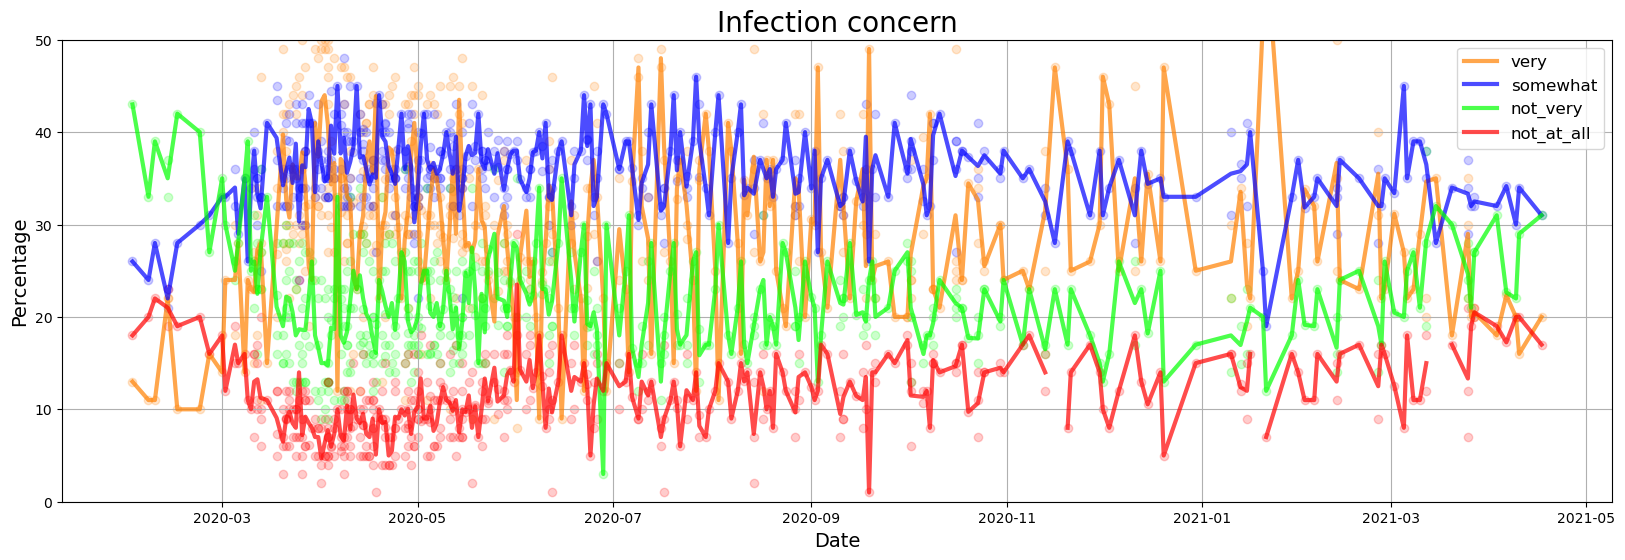

In [124]:
# plotting
plt.figure(figsize=(20,6))
plt.grid('major', axis = 'both')
plt.ylim((0,50))

plt.plot(dates0, very, color = (1.0, 0.5, 0.0, 0.7), linewidth= 3, label = 'very')
plt.scatter(InfVery.start_date, InfVery.very, color = (1.0, 0.5, 0.0, 0.2))

plt.plot(dates1, somewhat, color = (0.0, 0.0, 1.0, 0.7), linewidth= 3, label = 'somewhat')
plt.scatter(Infsomewhat.start_date, Infsomewhat.somewhat, color = (0.0, 0.0, 1.0, 0.2))

plt.plot(dates2, not_very, color = (0.0, 1.0, 0.0, 0.7), linewidth= 3, label = 'not_very')
plt.scatter(Infnot_very.start_date, Infnot_very.not_very, color = (0.0, 1.0, 0.0, 0.2))

plt.plot(dates3, not_at_all, color = (1.0, 0.0, 0.0, 0.7), linewidth= 3, label = 'not_at_all')
plt.scatter(Infnot_at_all.start_date, Infnot_at_all.not_at_all, color = (1.0, 0.0, 0.0, 0.2))

plt.title('Infection concern', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()

## 5. How worried are Americans about the economy?

In [127]:
# Very
EcoVery = Economy_concern[Economy_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date','very']]

EcoVery['day'] = EcoVery.start_date.apply(lambda x: x.day)
EcoVery['month'] = EcoVery.start_date.apply(lambda x: x.month)
EcoVery['year'] = EcoVery.start_date.apply(lambda x: x.year)

EcoVery['start_date'] = EcoVery['month'].astype('str').str[:] + "-" \
+ EcoVery['day'].astype('str').str[:] + "-" + EcoVery['year'].astype('str').str[:]

EcoVery['start_date'] = pd.to_datetime(EcoVery['start_date']) 
EcoVery.sort_values('start_date', ascending = True, inplace = True)
EcoVery

start_date  very  day  month  year
0   2020-01-27  19.0   27      1  2020
1   2020-01-31  26.0   31      1  2020
3   2020-02-07  23.0    7      2  2020
7   2020-02-13  22.0   13      2  2020
11  2020-02-24  32.0   24      2  2020
..         ...   ...  ...    ...   ...
644 2021-02-12  46.0   12      2  2021
648 2021-02-19  47.0   19      2  2021
651 2021-02-26  45.0   26      2  2021
657 2021-03-05  46.0    5      3  2021
661 2021-03-12  43.0   12      3  2021

[212 rows x 5 columns]

In [128]:
# somewhat
Ecosomewhat = Economy_concern[Economy_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date','somewhat']]

Ecosomewhat['day'] = Ecosomewhat.start_date.apply(lambda x: x.day)
Ecosomewhat['month'] = Ecosomewhat.start_date.apply(lambda x: x.month)
Ecosomewhat['year'] = Ecosomewhat.start_date.apply(lambda x: x.year)

Ecosomewhat['start_date'] = Ecosomewhat['month'].astype('str').str[:] + "-" \
+ Ecosomewhat['day'].astype('str').str[:] + "-" + Ecosomewhat['year'].astype('str').str[:]

Ecosomewhat['start_date'] = pd.to_datetime(Ecosomewhat['start_date']) 
Ecosomewhat.sort_values('start_date', ascending = True, inplace = True)
Ecosomewhat

start_date  somewhat  day  month  year
0   2020-01-27      33.0   27      1  2020
1   2020-01-31      32.0   31      1  2020
3   2020-02-07      32.0    7      2  2020
7   2020-02-13      35.0   13      2  2020
11  2020-02-24      37.0   24      2  2020
..         ...       ...  ...    ...   ...
644 2021-02-12      39.0   12      2  2021
648 2021-02-19      38.0   19      2  2021
651 2021-02-26      38.0   26      2  2021
657 2021-03-05      38.0    5      3  2021
661 2021-03-12      41.0   12      3  2021

[212 rows x 5 columns]

In [129]:
# not_very
Econot_very = Economy_concern[Economy_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date', 'not_very']]

Econot_very['day'] = Econot_very.start_date.apply(lambda x: x.day)
Econot_very['month'] = Econot_very.start_date.apply(lambda x: x.month)
Econot_very['year'] = Econot_very.start_date.apply(lambda x: x.year)

Econot_very['start_date'] = Econot_very['month'].astype('str').str[:] + "-" \
+ Econot_very['day'].astype('str').str[:] + "-" + Econot_very['year'].astype('str').str[:]

Econot_very['start_date'] = pd.to_datetime(Econot_very['start_date']) 
Econot_very.sort_values('start_date', ascending = True, inplace = True)
Econot_very

start_date  not_very  day  month  year
0   2020-01-27      23.0   27      1  2020
1   2020-01-31      25.0   31      1  2020
3   2020-02-07      24.0    7      2  2020
7   2020-02-13      28.0   13      2  2020
11  2020-02-24      18.0   24      2  2020
..         ...       ...  ...    ...   ...
644 2021-02-12      11.0   12      2  2021
648 2021-02-19      11.0   19      2  2021
651 2021-02-26      11.0   26      2  2021
657 2021-03-05      10.0    5      3  2021
661 2021-03-12      11.0   12      3  2021

[212 rows x 5 columns]

In [130]:
# not_at_all
Econot_at_all = Economy_concern[Economy_concern['start_date'] > pd.to_datetime('2020-1-1')][['start_date', 'not_at_all']]

Econot_at_all['day'] = Econot_at_all.start_date.apply(lambda x: x.day)
Econot_at_all['month'] = Econot_at_all.start_date.apply(lambda x: x.month)
Econot_at_all['year'] = Econot_at_all.start_date.apply(lambda x: x.year)

Econot_at_all['start_date'] = Econot_at_all['month'].astype('str').str[:] + "-" \
+ Econot_at_all['day'].astype('str').str[:] + "-" + Econot_at_all['year'].astype('str').str[:]

Econot_at_all['start_date'] = pd.to_datetime(Econot_at_all['start_date']) 
Econot_at_all.sort_values('start_date', ascending = True, inplace = True)
Econot_at_all

start_date  not_at_all  day  month  year
0   2020-01-27        11.0   27      1  2020
1   2020-01-31         7.0   31      1  2020
3   2020-02-07         9.0    7      2  2020
7   2020-02-13        15.0   13      2  2020
11  2020-02-24         6.0   24      2  2020
..         ...         ...  ...    ...   ...
644 2021-02-12         4.0   12      2  2021
648 2021-02-19         4.0   19      2  2021
651 2021-02-26         6.0   26      2  2021
657 2021-03-05         5.0    5      3  2021
661 2021-03-12         5.0   12      3  2021

[212 rows x 5 columns]

In [131]:
# Aggregating 0
grouped = Economy_concern.groupby('start_date')

dates0 = []
very = []

for item in grouped:
    dates0.append(item[0])
    very.append(item[1].very.mean())
# Aggregating 1
grouped = Economy_concern.groupby('start_date')

dates1 = []
somewhat = []

for item in grouped:
    dates1.append(item[0])
    somewhat.append(item[1].somewhat.mean())
# Aggregating 2
grouped = Economy_concern.groupby('start_date')

dates2 = []
not_very = []

for item in grouped:
    dates2.append(item[0])
    not_very.append(item[1].not_very.mean())
# Aggregating 3
grouped = Economy_concern.groupby('start_date')

dates3 = []
not_at_all = []

for item in grouped:
    dates3.append(item[0])
    not_at_all.append(item[1].not_at_all.mean())

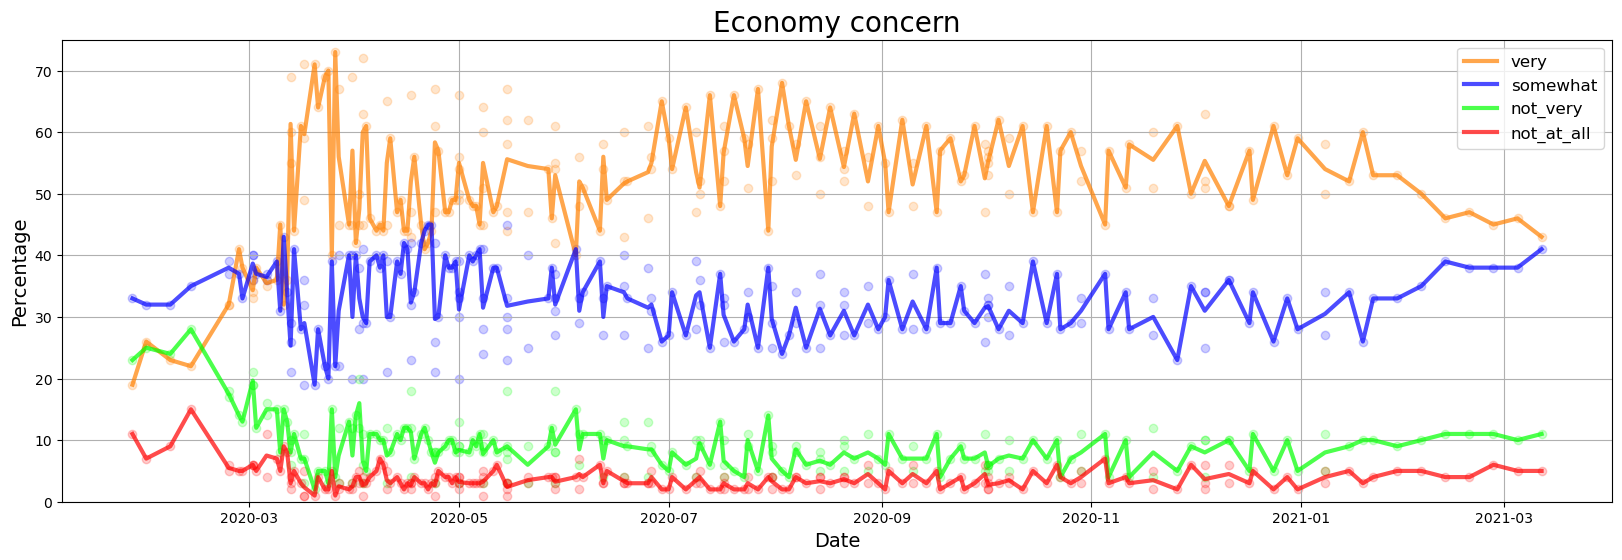

In [133]:
# plotting
plt.figure(figsize=(20,6))
plt.grid('major', axis = 'both')
plt.ylim((0,75))

plt.plot(dates0, very, color = (1.0, 0.5, 0.0, 0.7), linewidth= 3, label = 'very')
plt.scatter(EcoVery.start_date, EcoVery.very, color = (1.0, 0.5, 0.0, 0.2))

plt.plot(dates1, somewhat, color = (0.0, 0.0, 1.0, 0.7), linewidth= 3, label = 'somewhat')
plt.scatter(Ecosomewhat.start_date, Ecosomewhat.somewhat, color = (0.0, 0.0, 1.0, 0.2))

plt.plot(dates2, not_very, color = (0.0, 1.0, 0.0, 0.7), linewidth= 3, label = 'not_very')
plt.scatter(Econot_very.start_date, Econot_very.not_very, color = (0.0, 1.0, 0.0, 0.2))

plt.plot(dates3, not_at_all, color = (1.0, 0.0, 0.0, 0.7), linewidth= 3, label = 'not_at_all')
plt.scatter(Econot_at_all.start_date, Econot_at_all.not_at_all, color = (1.0, 0.0, 0.0, 0.2))

plt.title('Economy concern', fontsize = 20)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)
plt.legend(fontsize = 12)
plt.show()